當前工作目錄 ==> /home/jovyan
Left Down point: 0 2040
Right Up point:  3800 9000
height (min, max) 0.0 357.21


y is 2040
y is 2060
y is 2080
y is 2100
y is 2120
y is 2140
y is 2160
y is 2180
y is 2200
y is 2220
y is 2240
y is 2260
y is 2280
y is 2300
y is 2320
y is 2340
y is 2360
y is 2380
y is 2400
y is 2420
y is 2440
y is 2460
y is 2480
y is 2500
y is 2520
y is 2540
y is 2560
y is 2580
y is 2600
y is 2620
y is 2640
y is 2660
y is 2680
y is 2700
y is 2720
y is 2740
y is 2760
y is 2780
y is 2800
y is 2820
y is 2840
y is 2860
y is 2880
y is 2900
y is 2920
y is 2940
y is 2960
y is 2980
y is 3000
y is 3020
y is 3040
y is 3060
y is 3080
y is 3100
y is 3120
y is 3140
y is 3160
y is 3180
y is 3200
y is 3220
y is 3240
y is 3260
y is 3280
y is 3300
y is 3320
y is 3340
y is 3360
y is 3380
y is 3400
y is 3420
y is 3440
y is 3460
y is 3480
y is 3500
y is 3520
y is 3540
y is 3560
y is 3580
y is 3600
y is 3620
y is 3640
y is 3660
y is 3680
y is 3700
y is 3720
y is 3740
y is 3760
y is 3780
y is 3800
y is

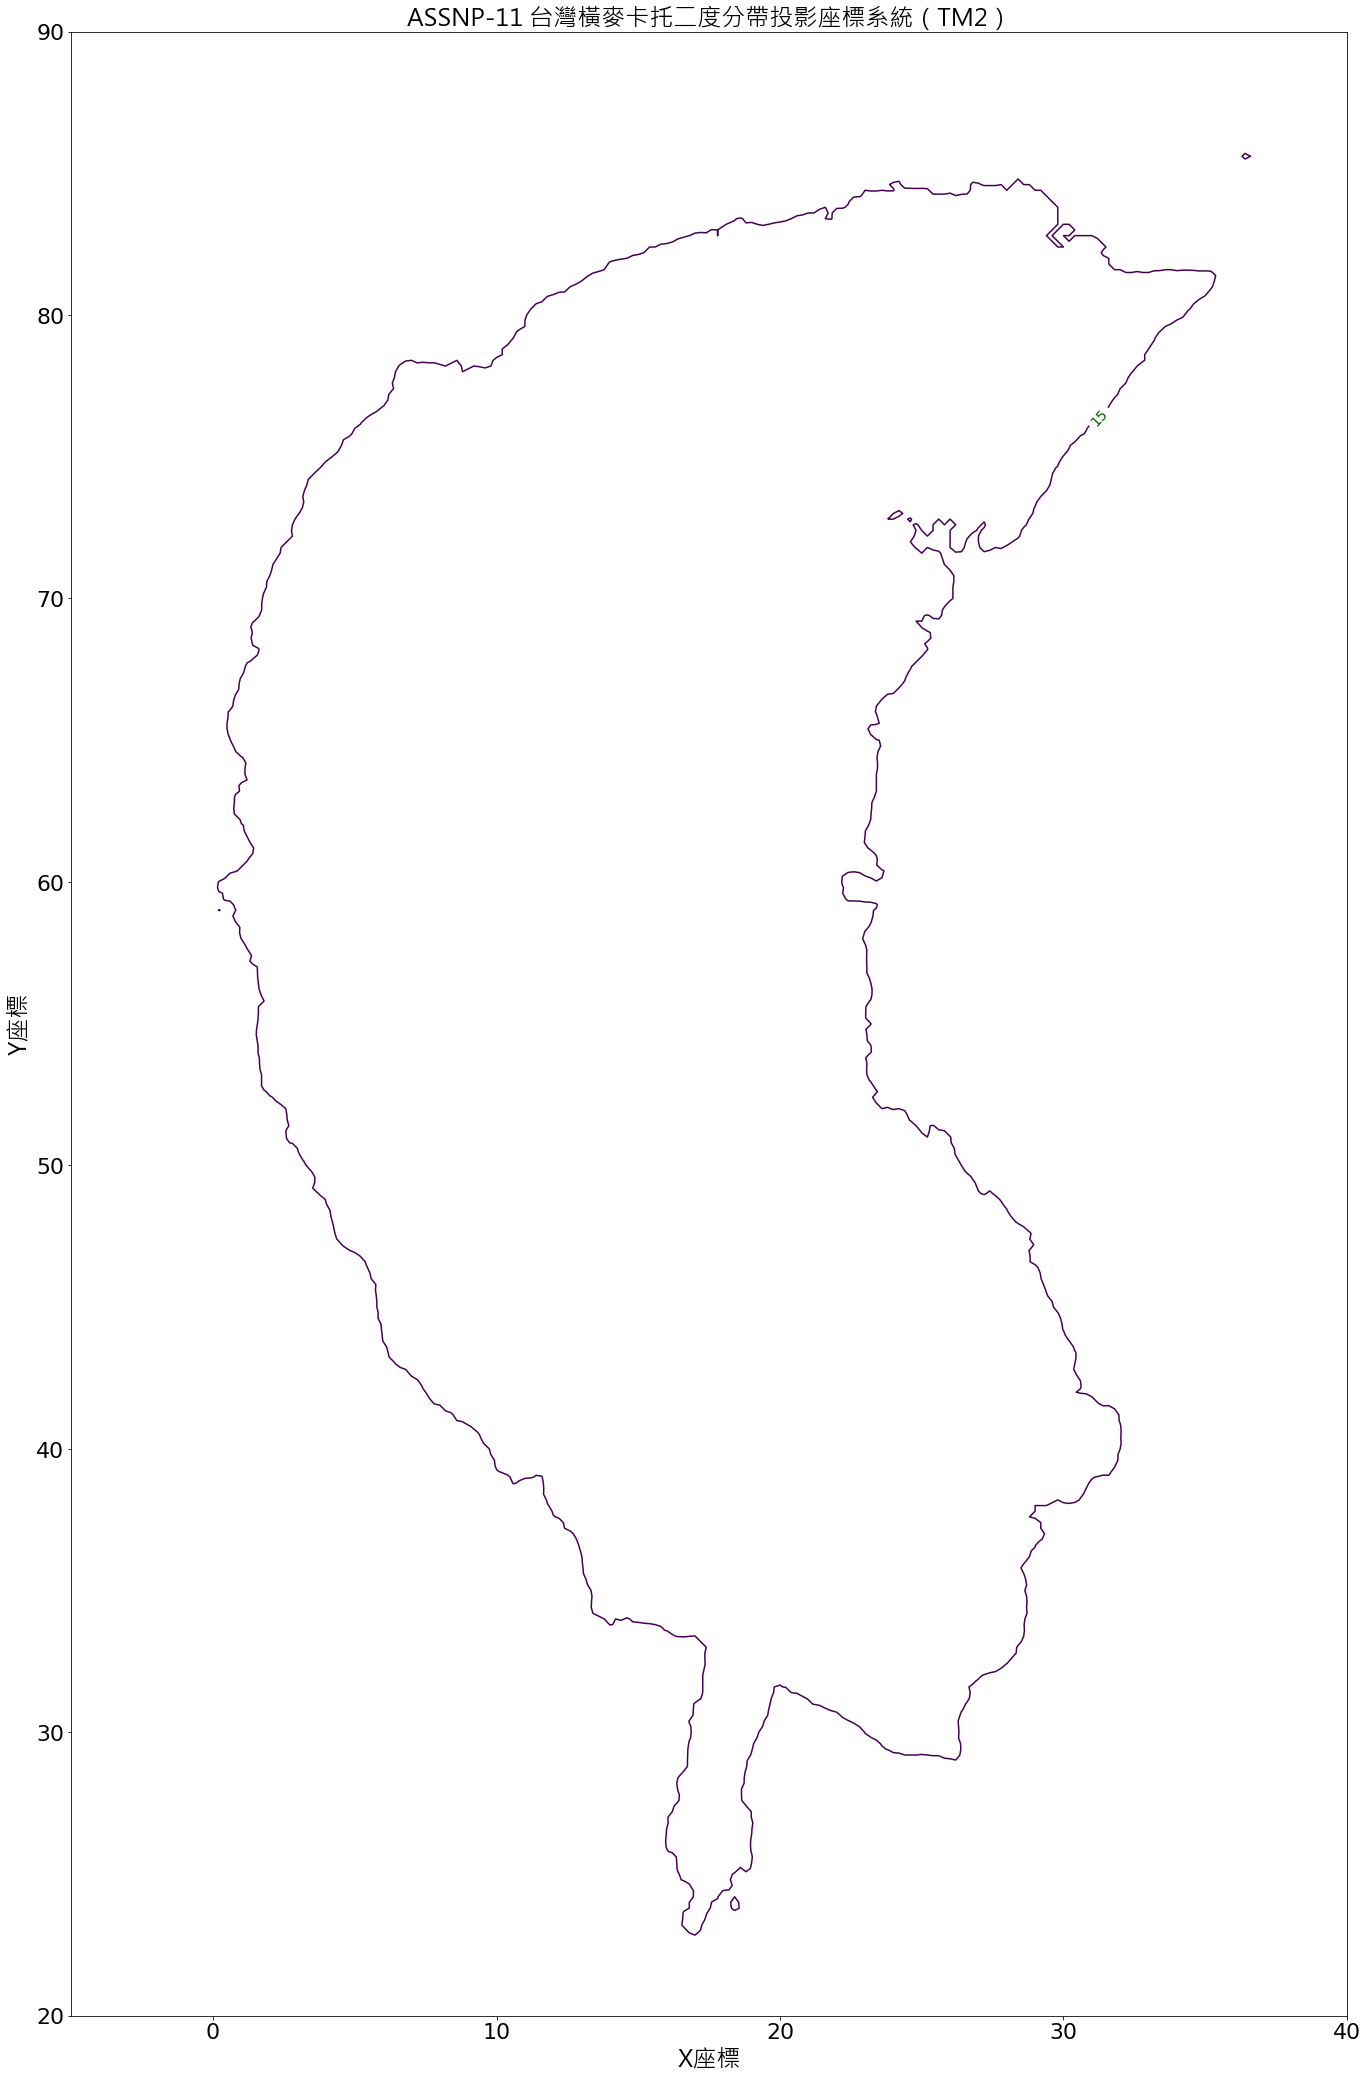

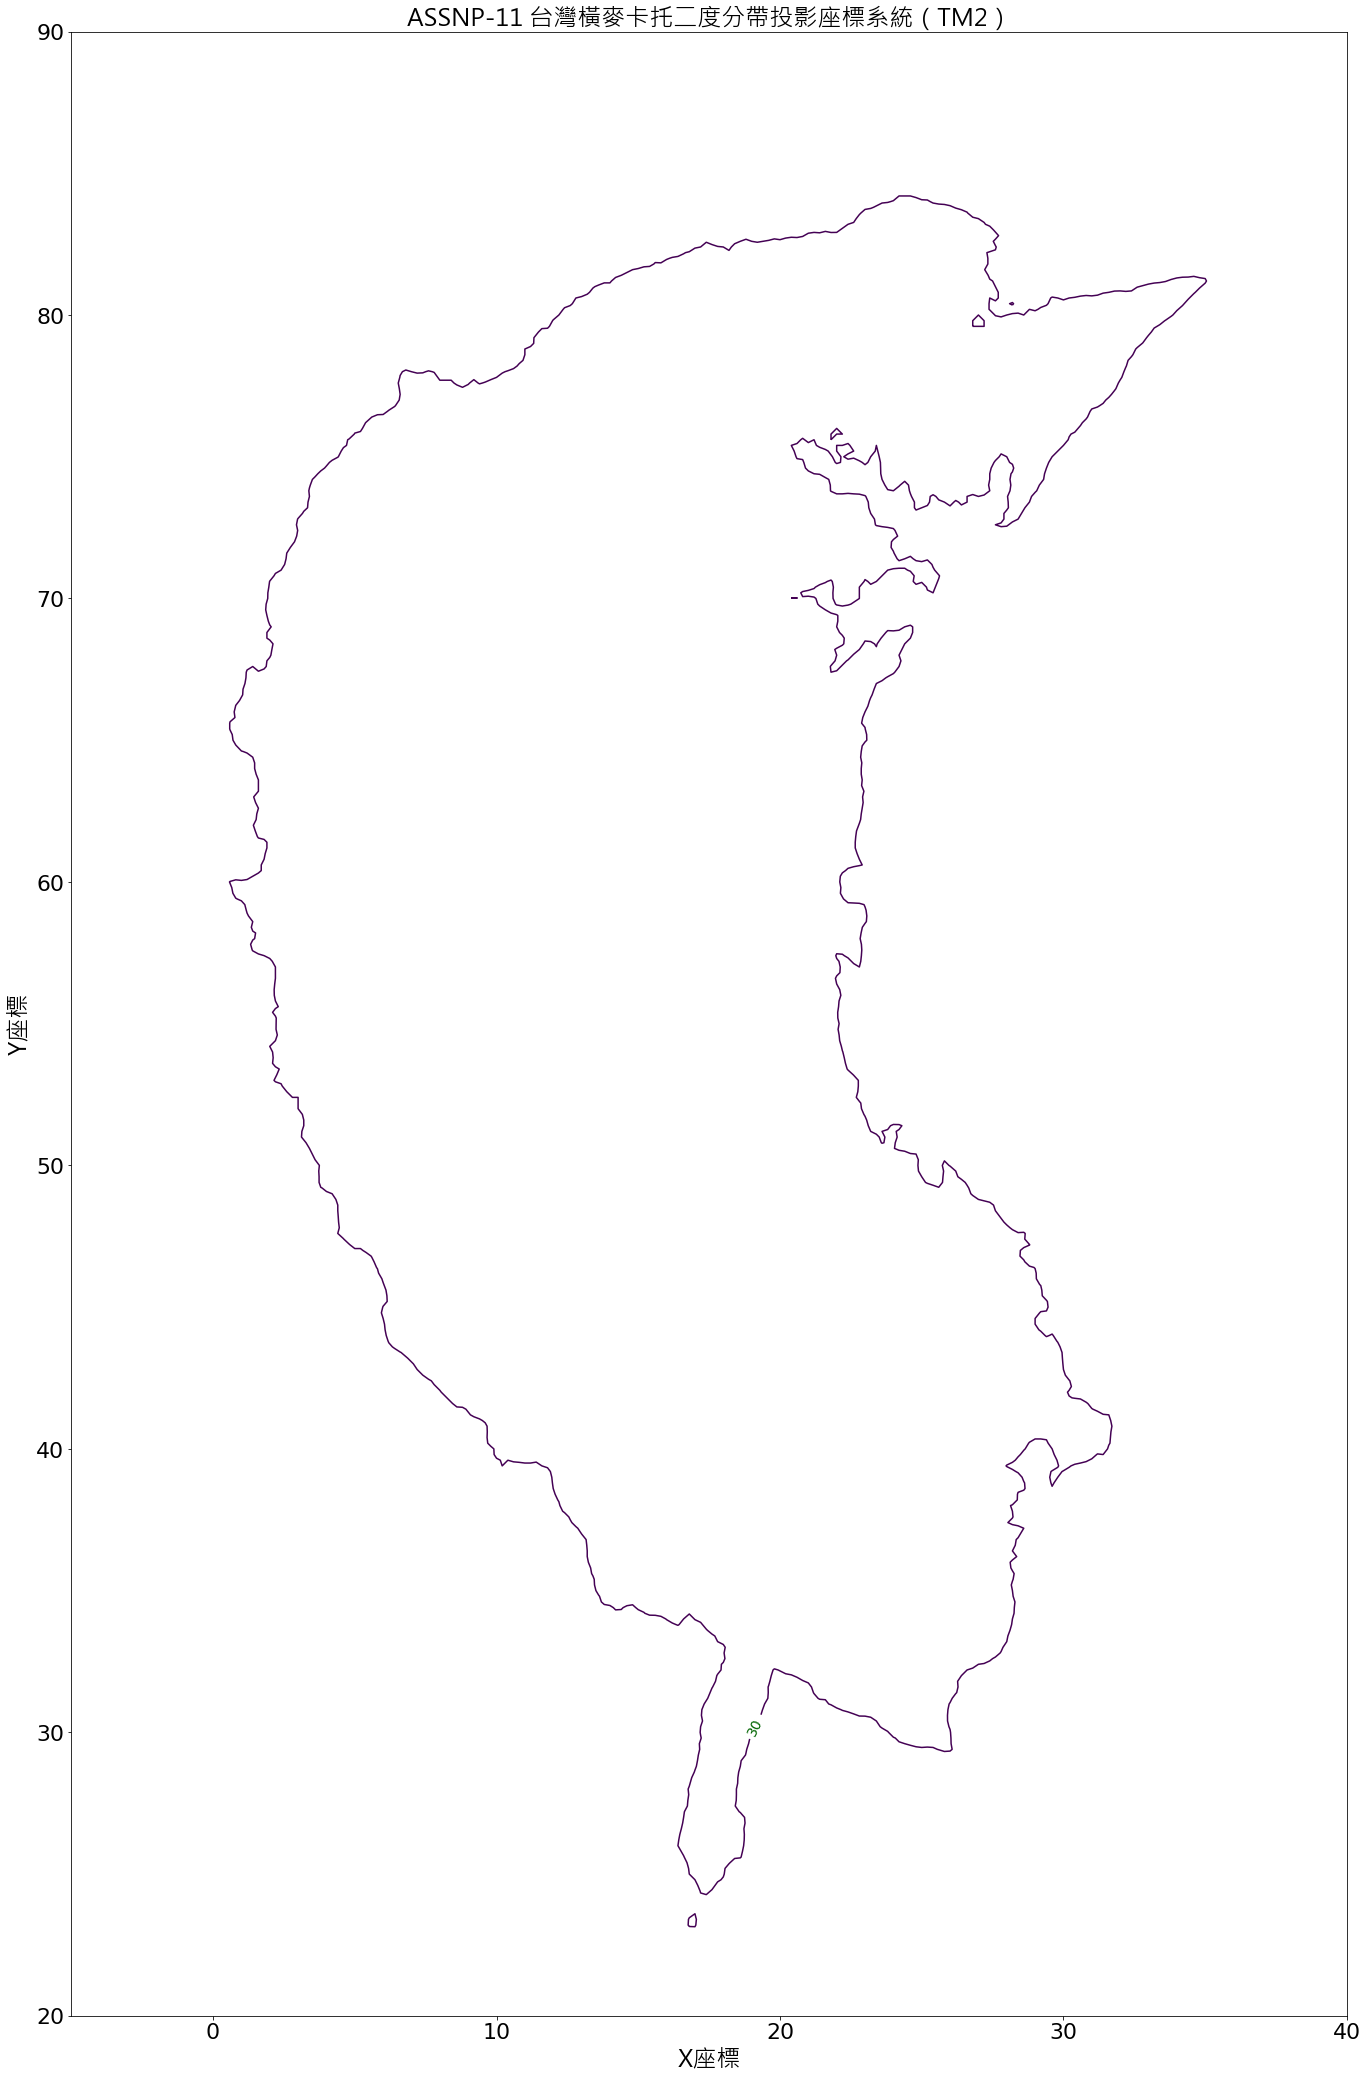

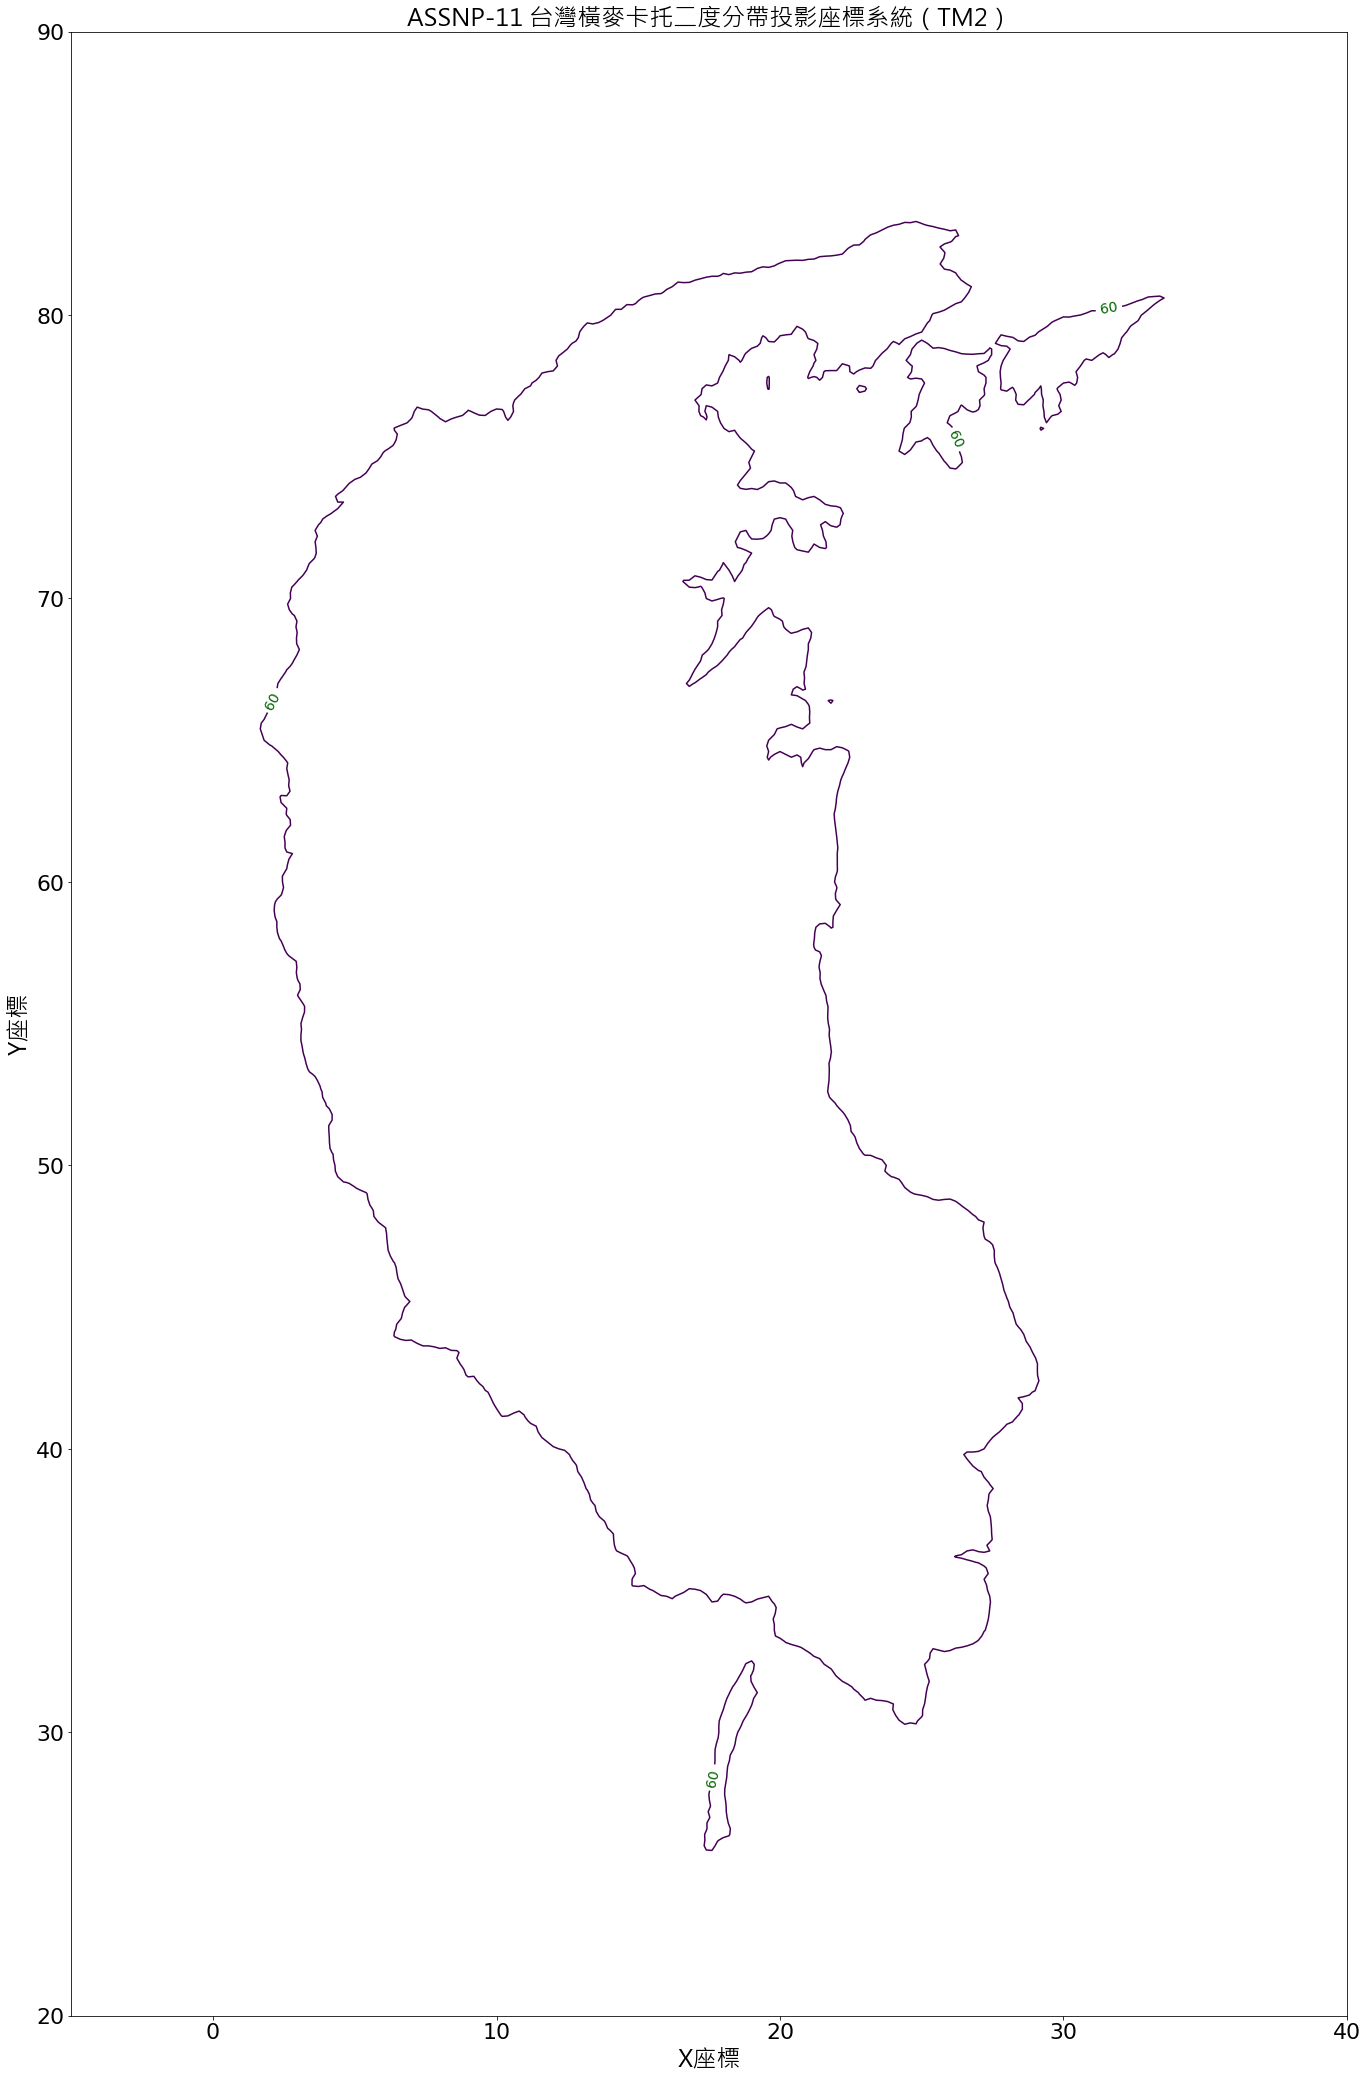

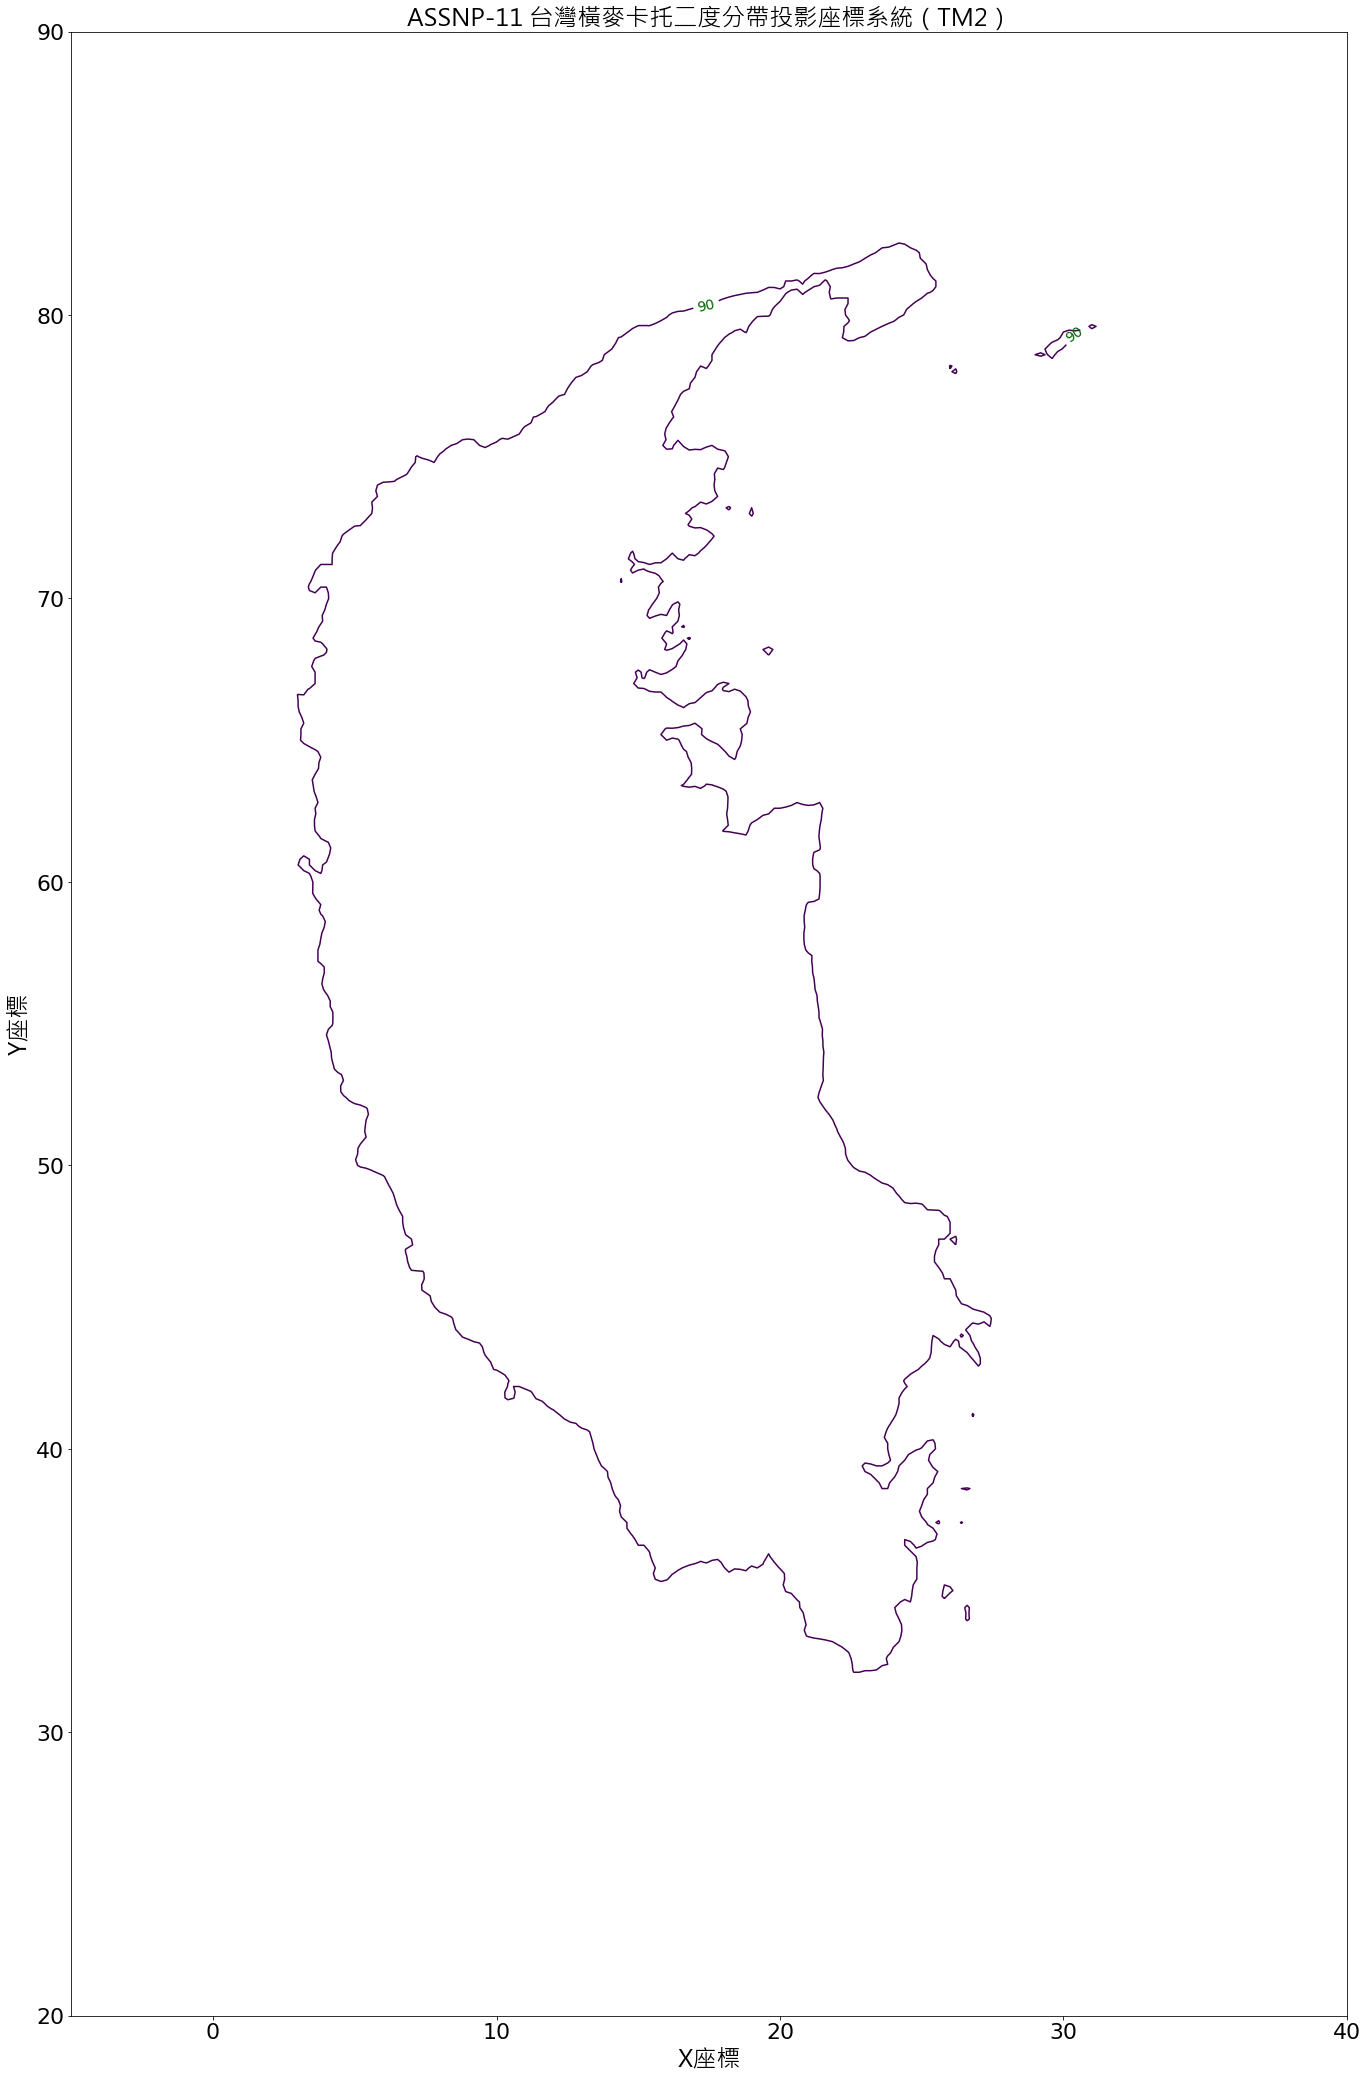

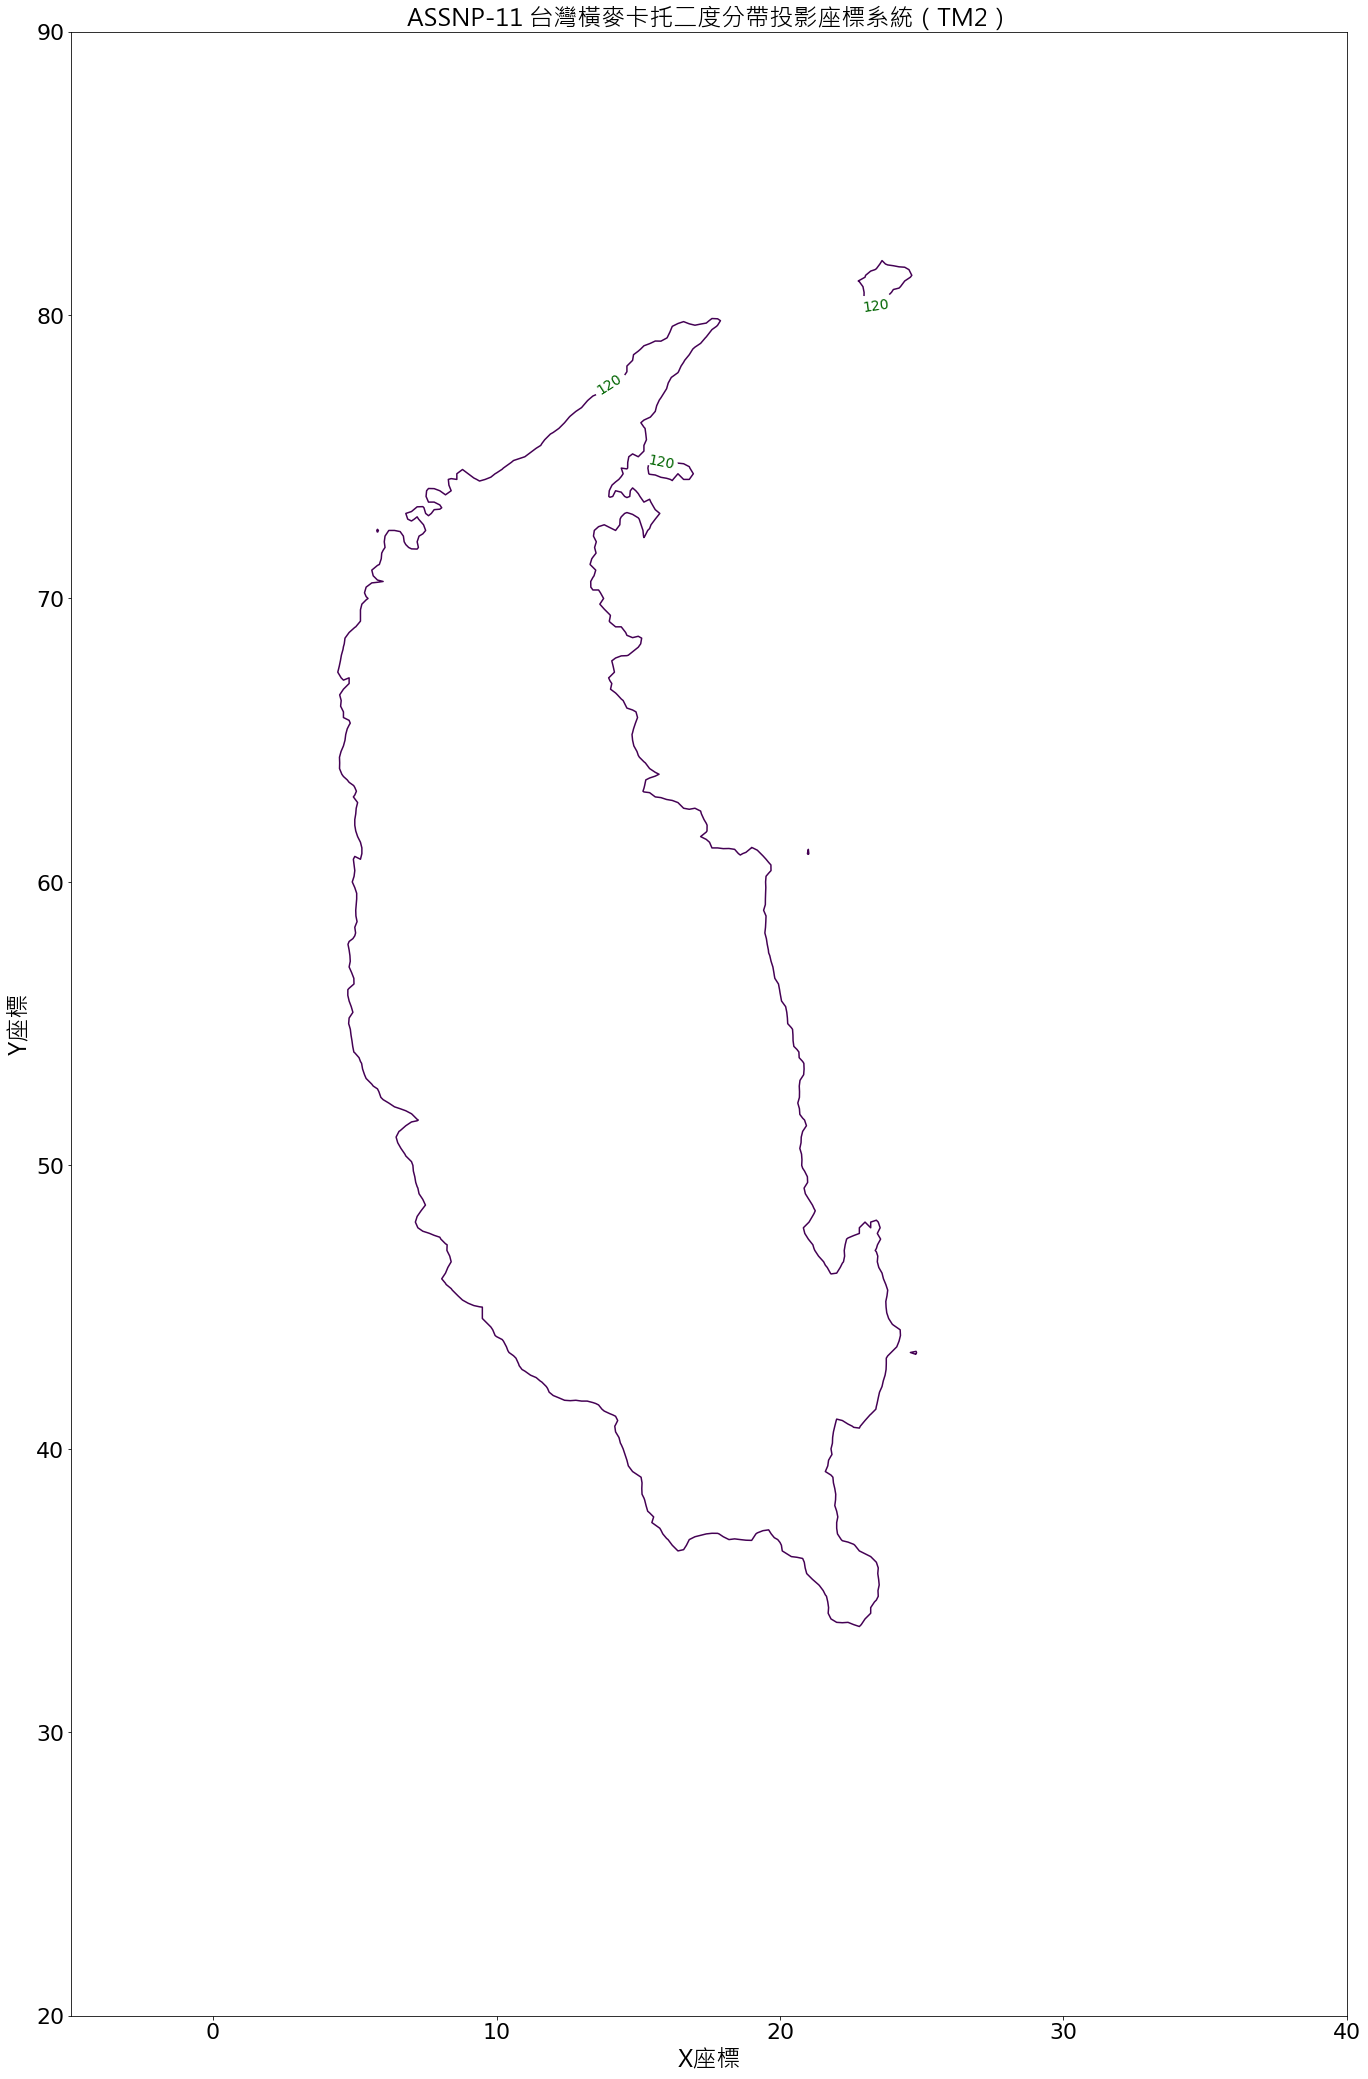

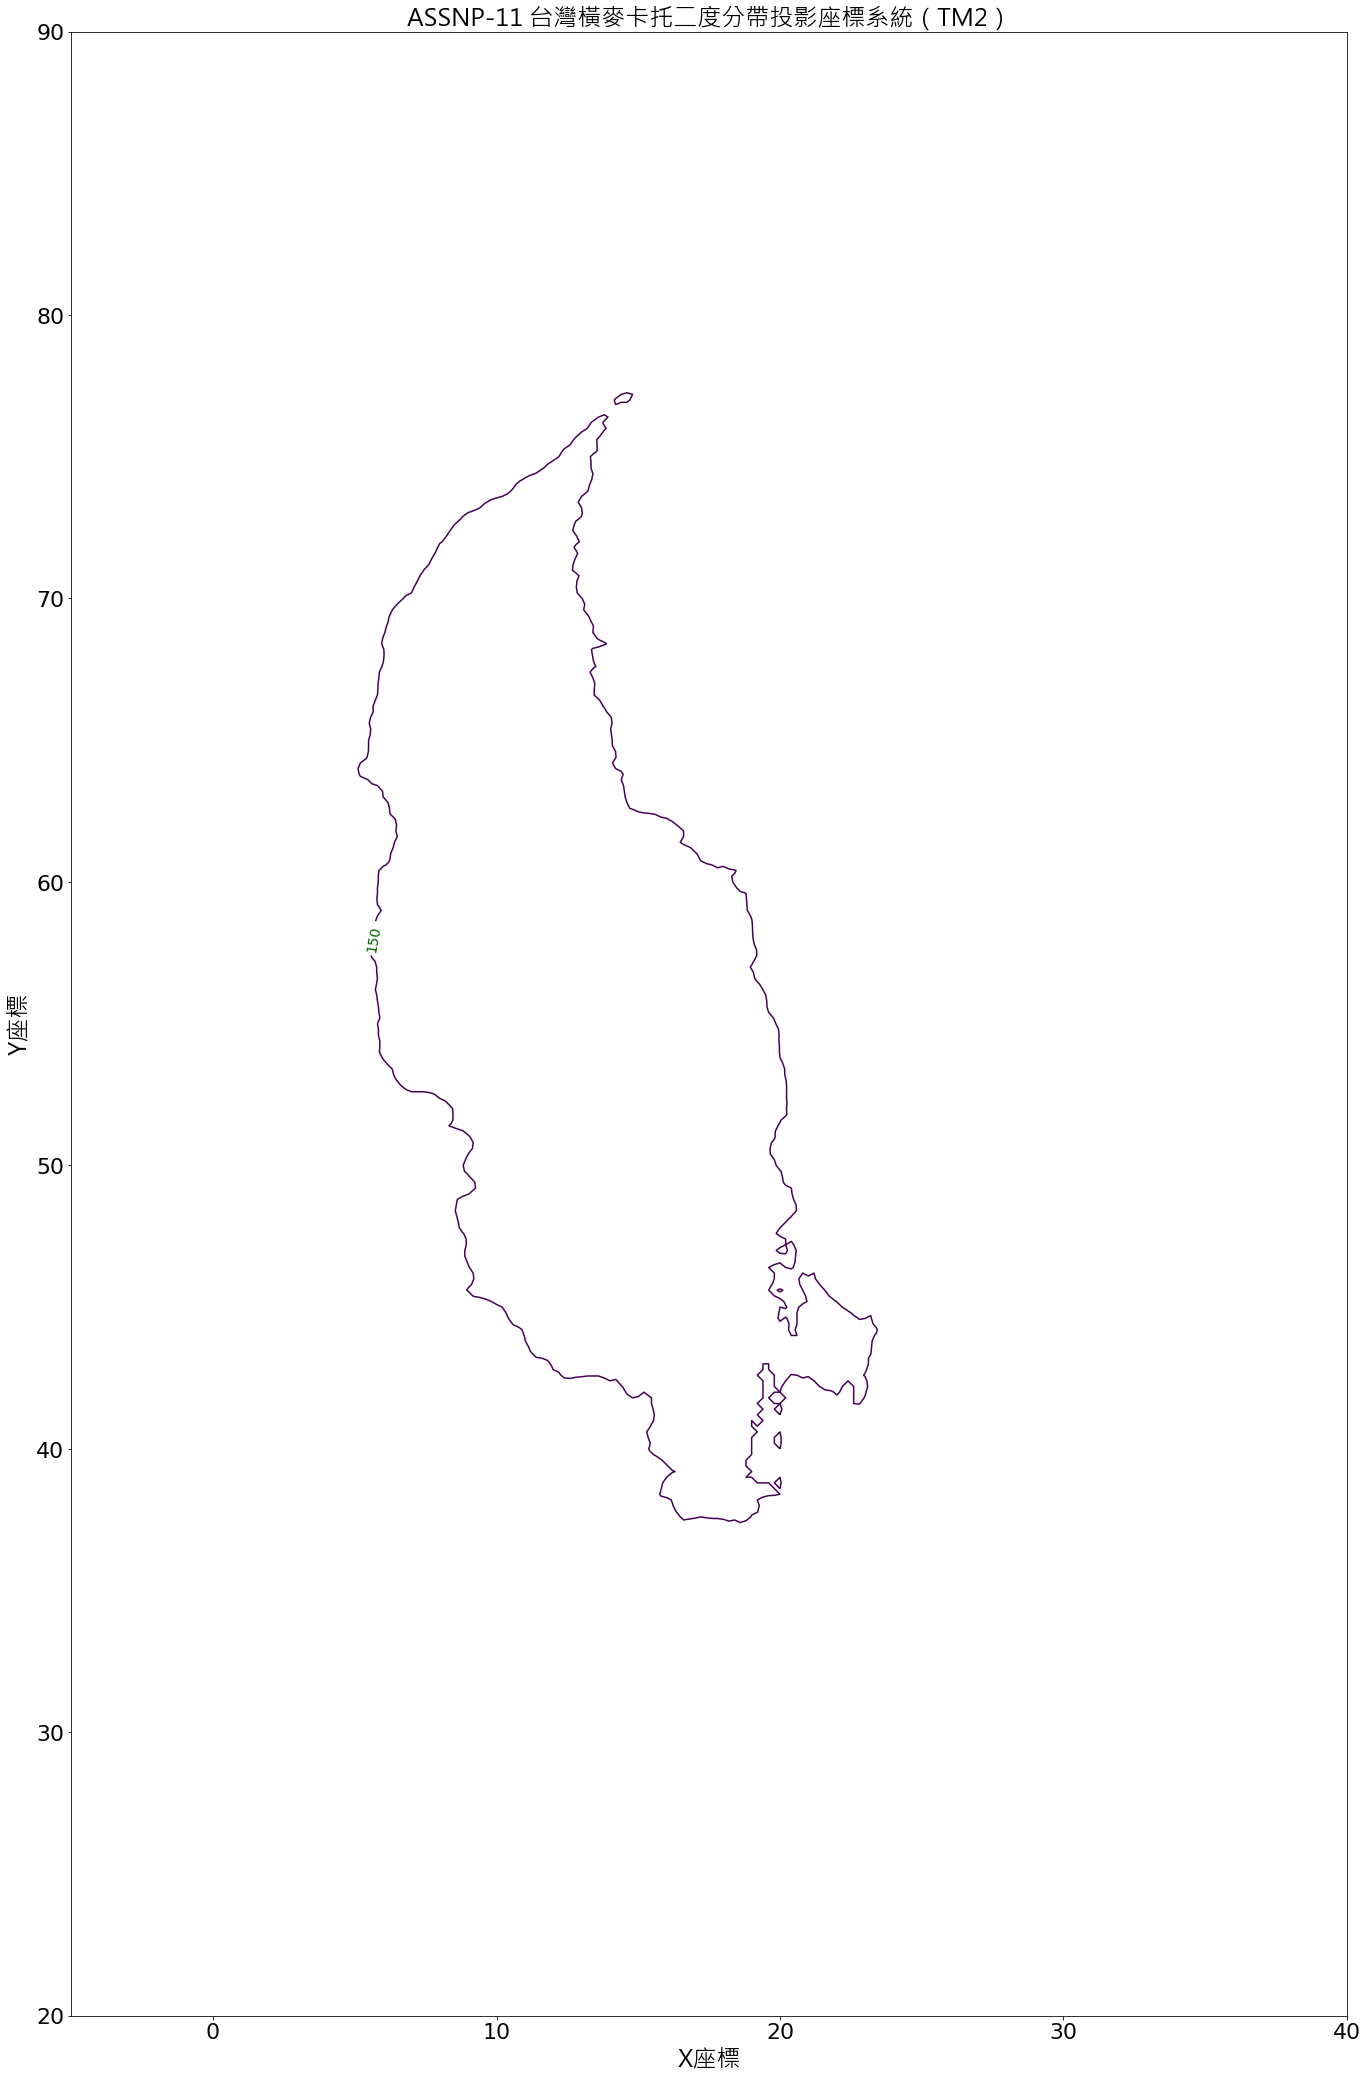

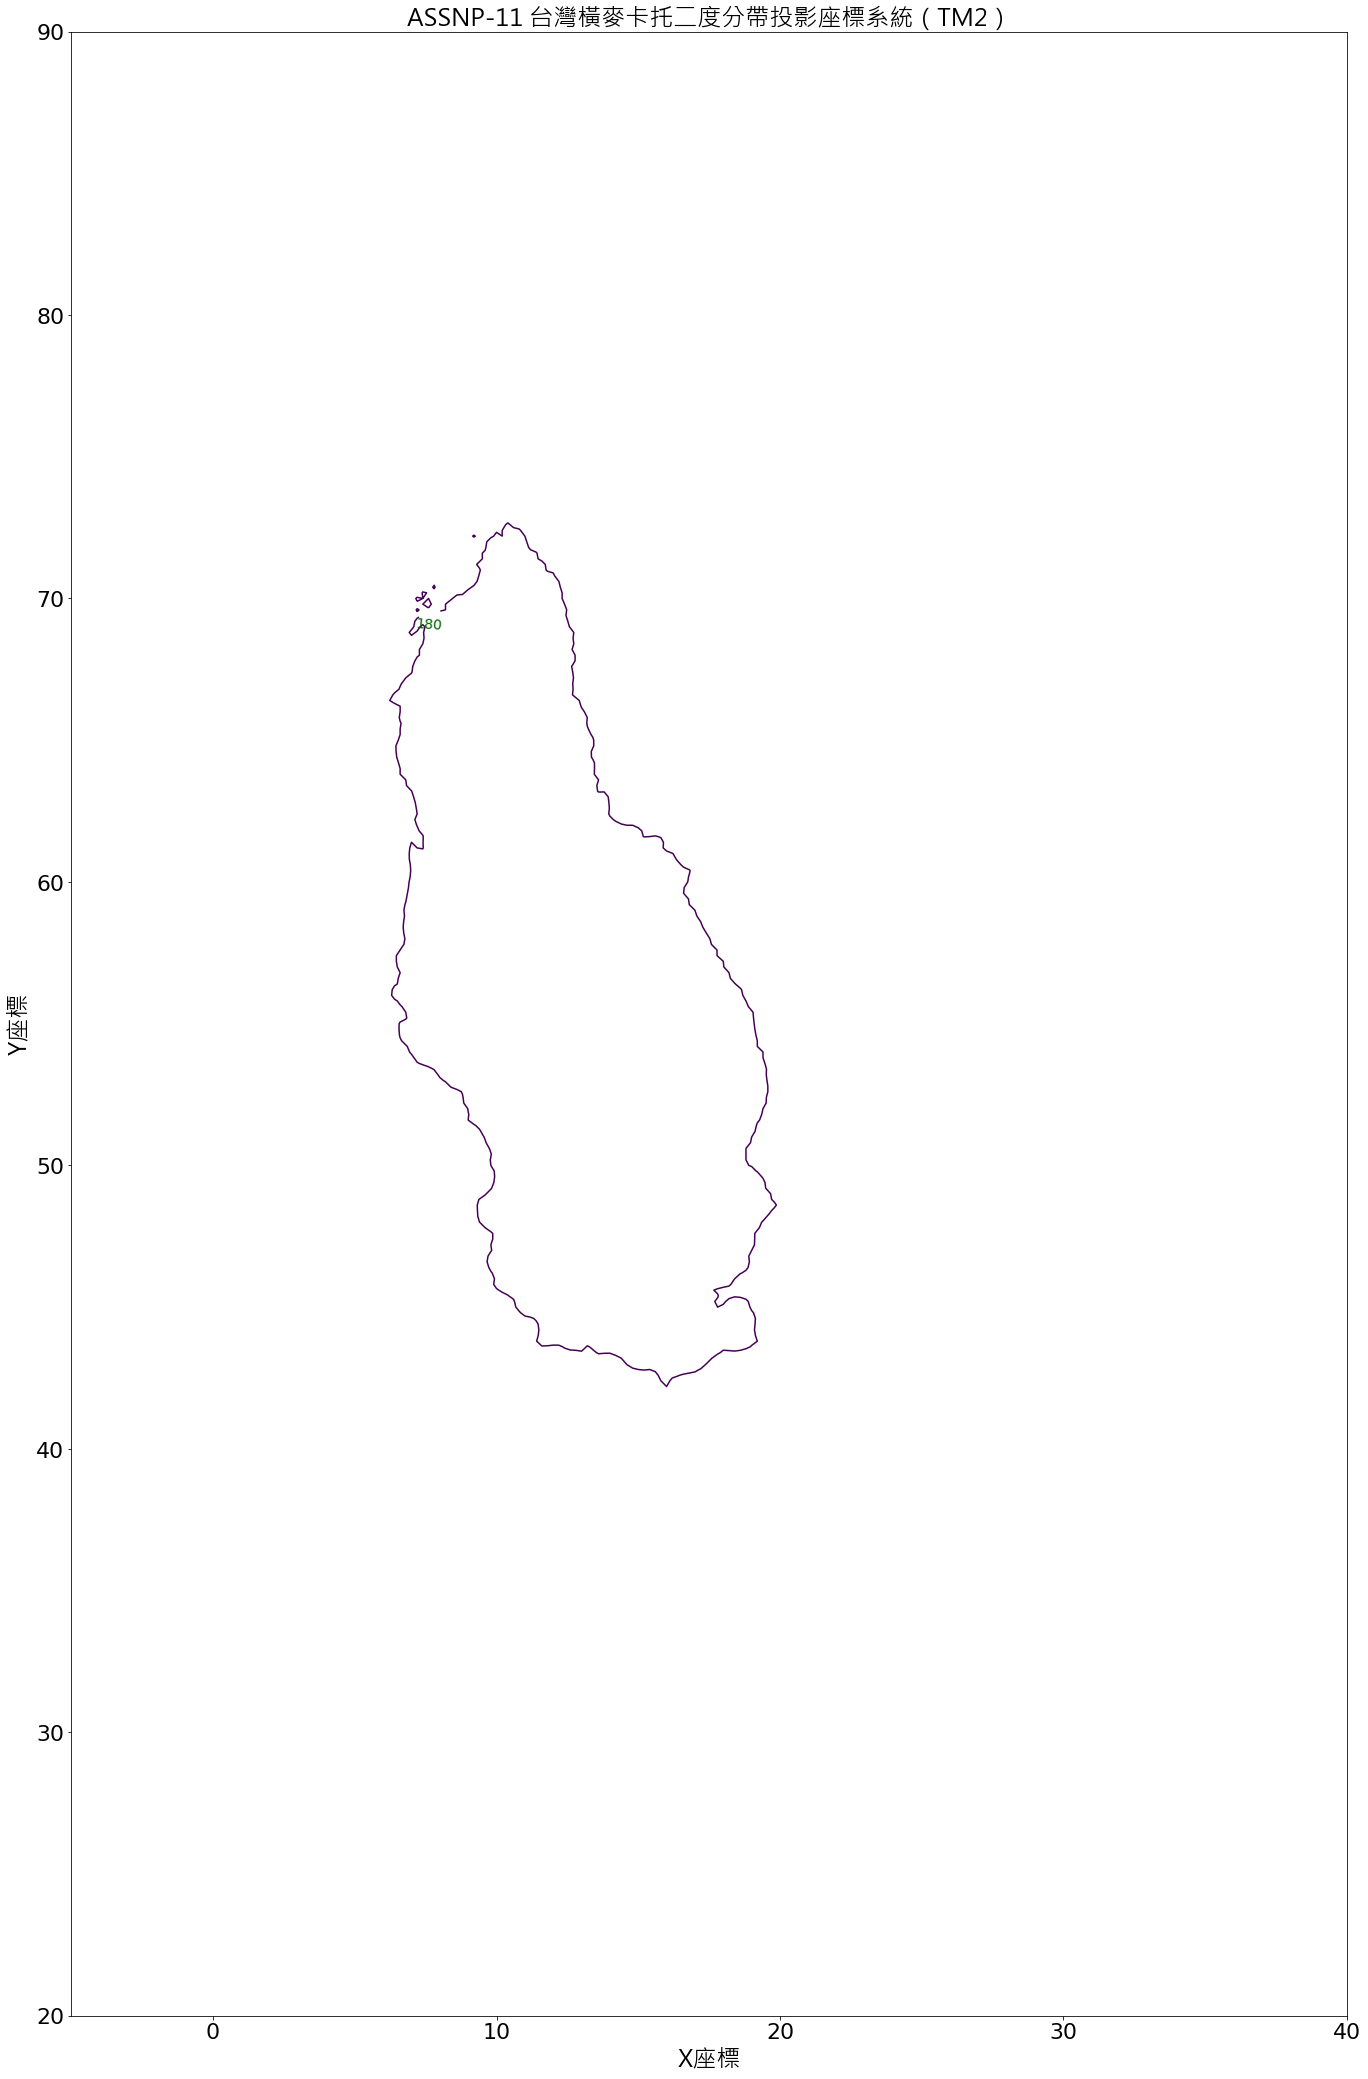

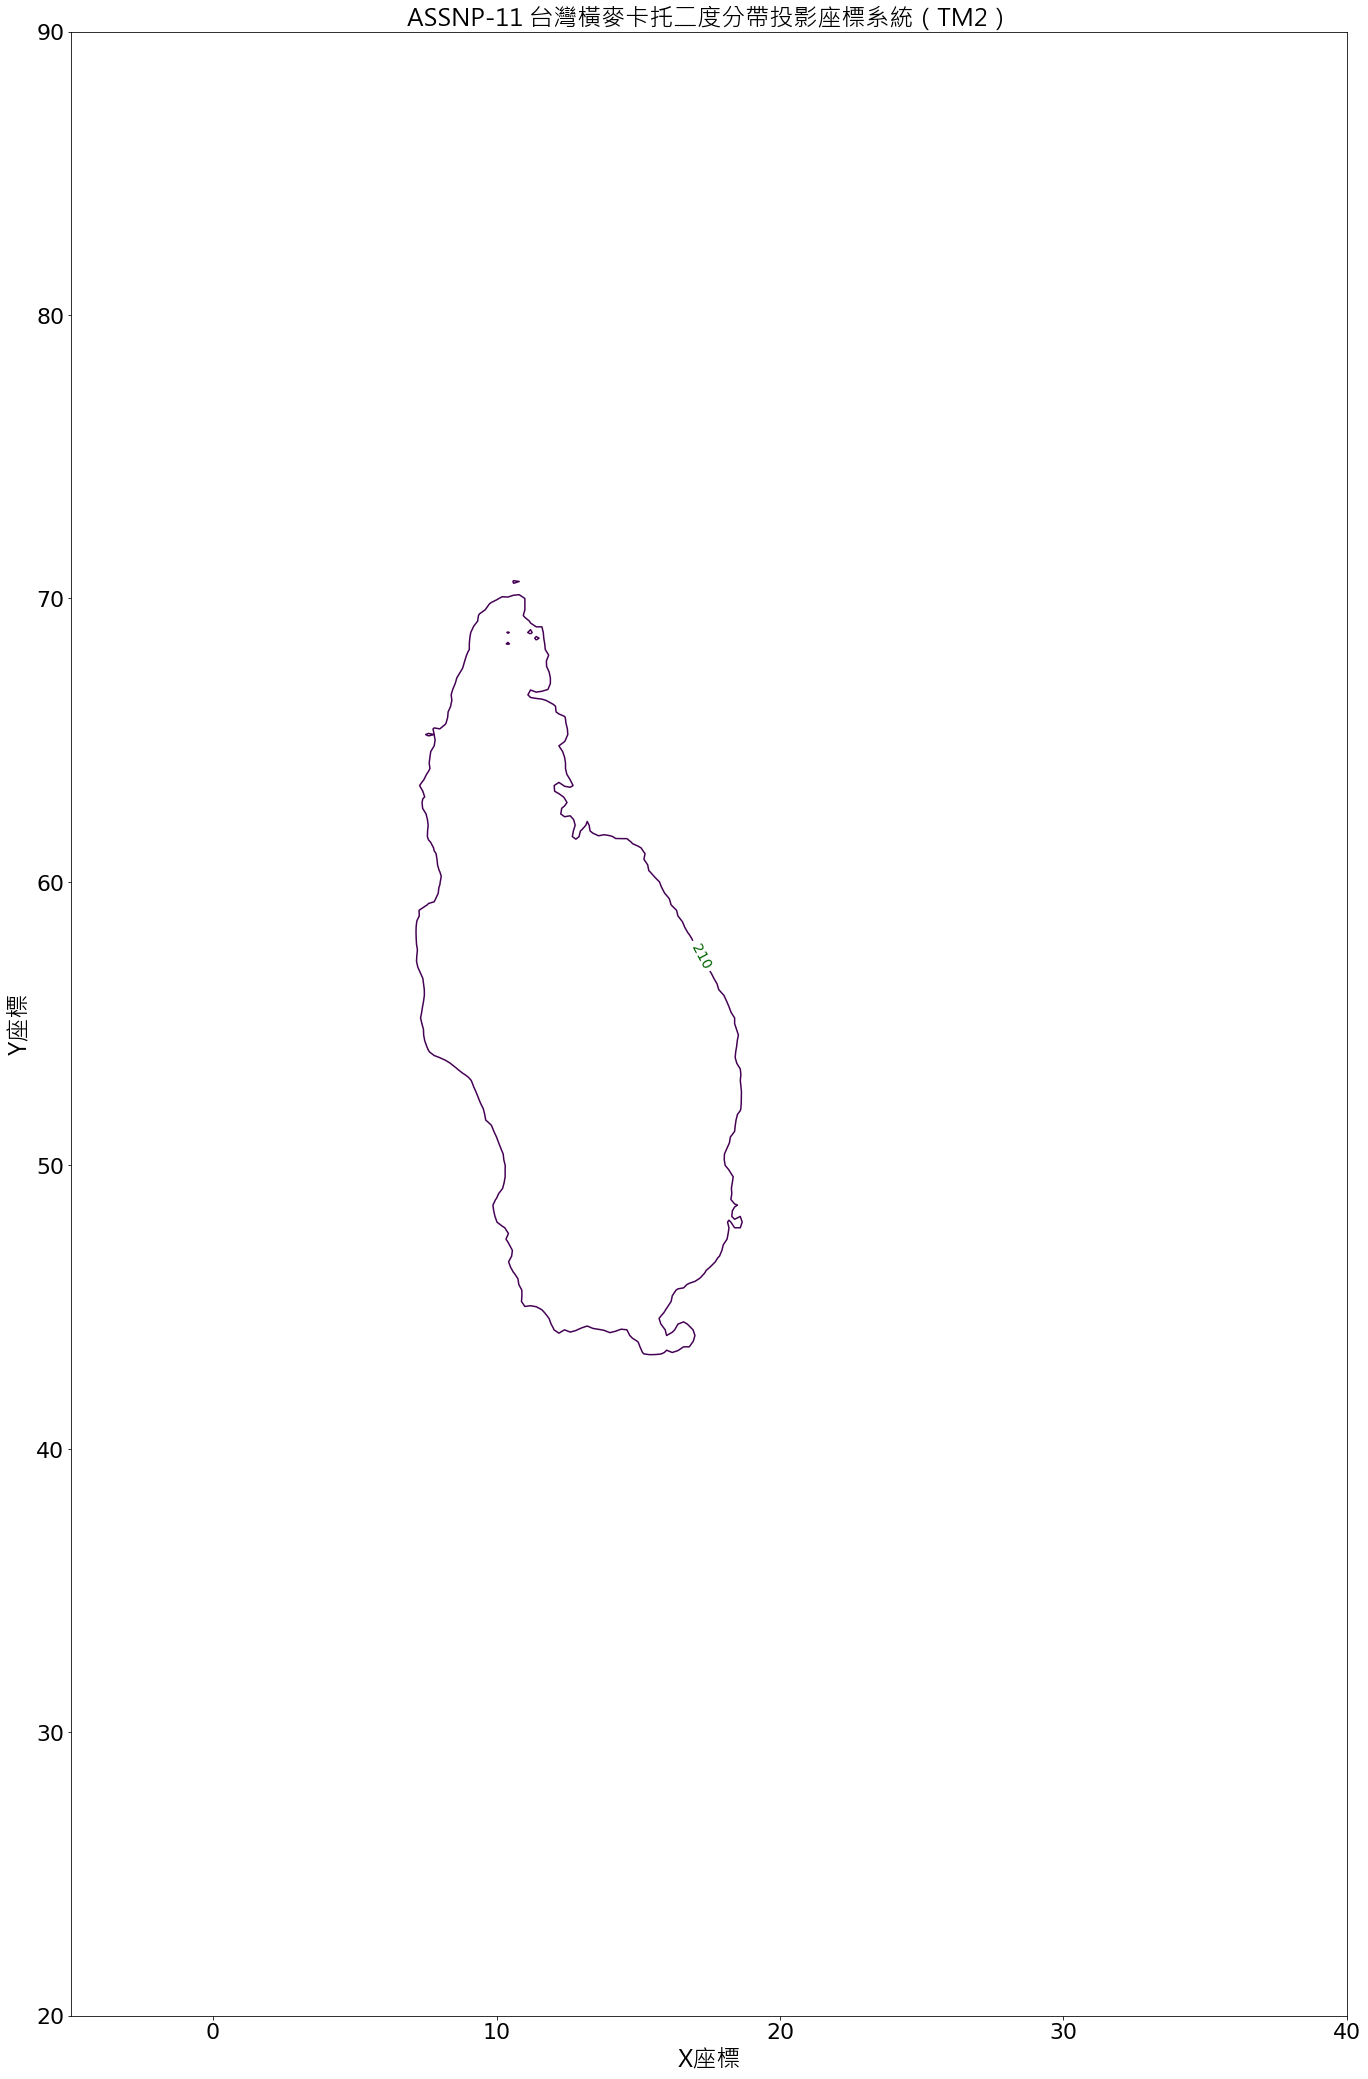

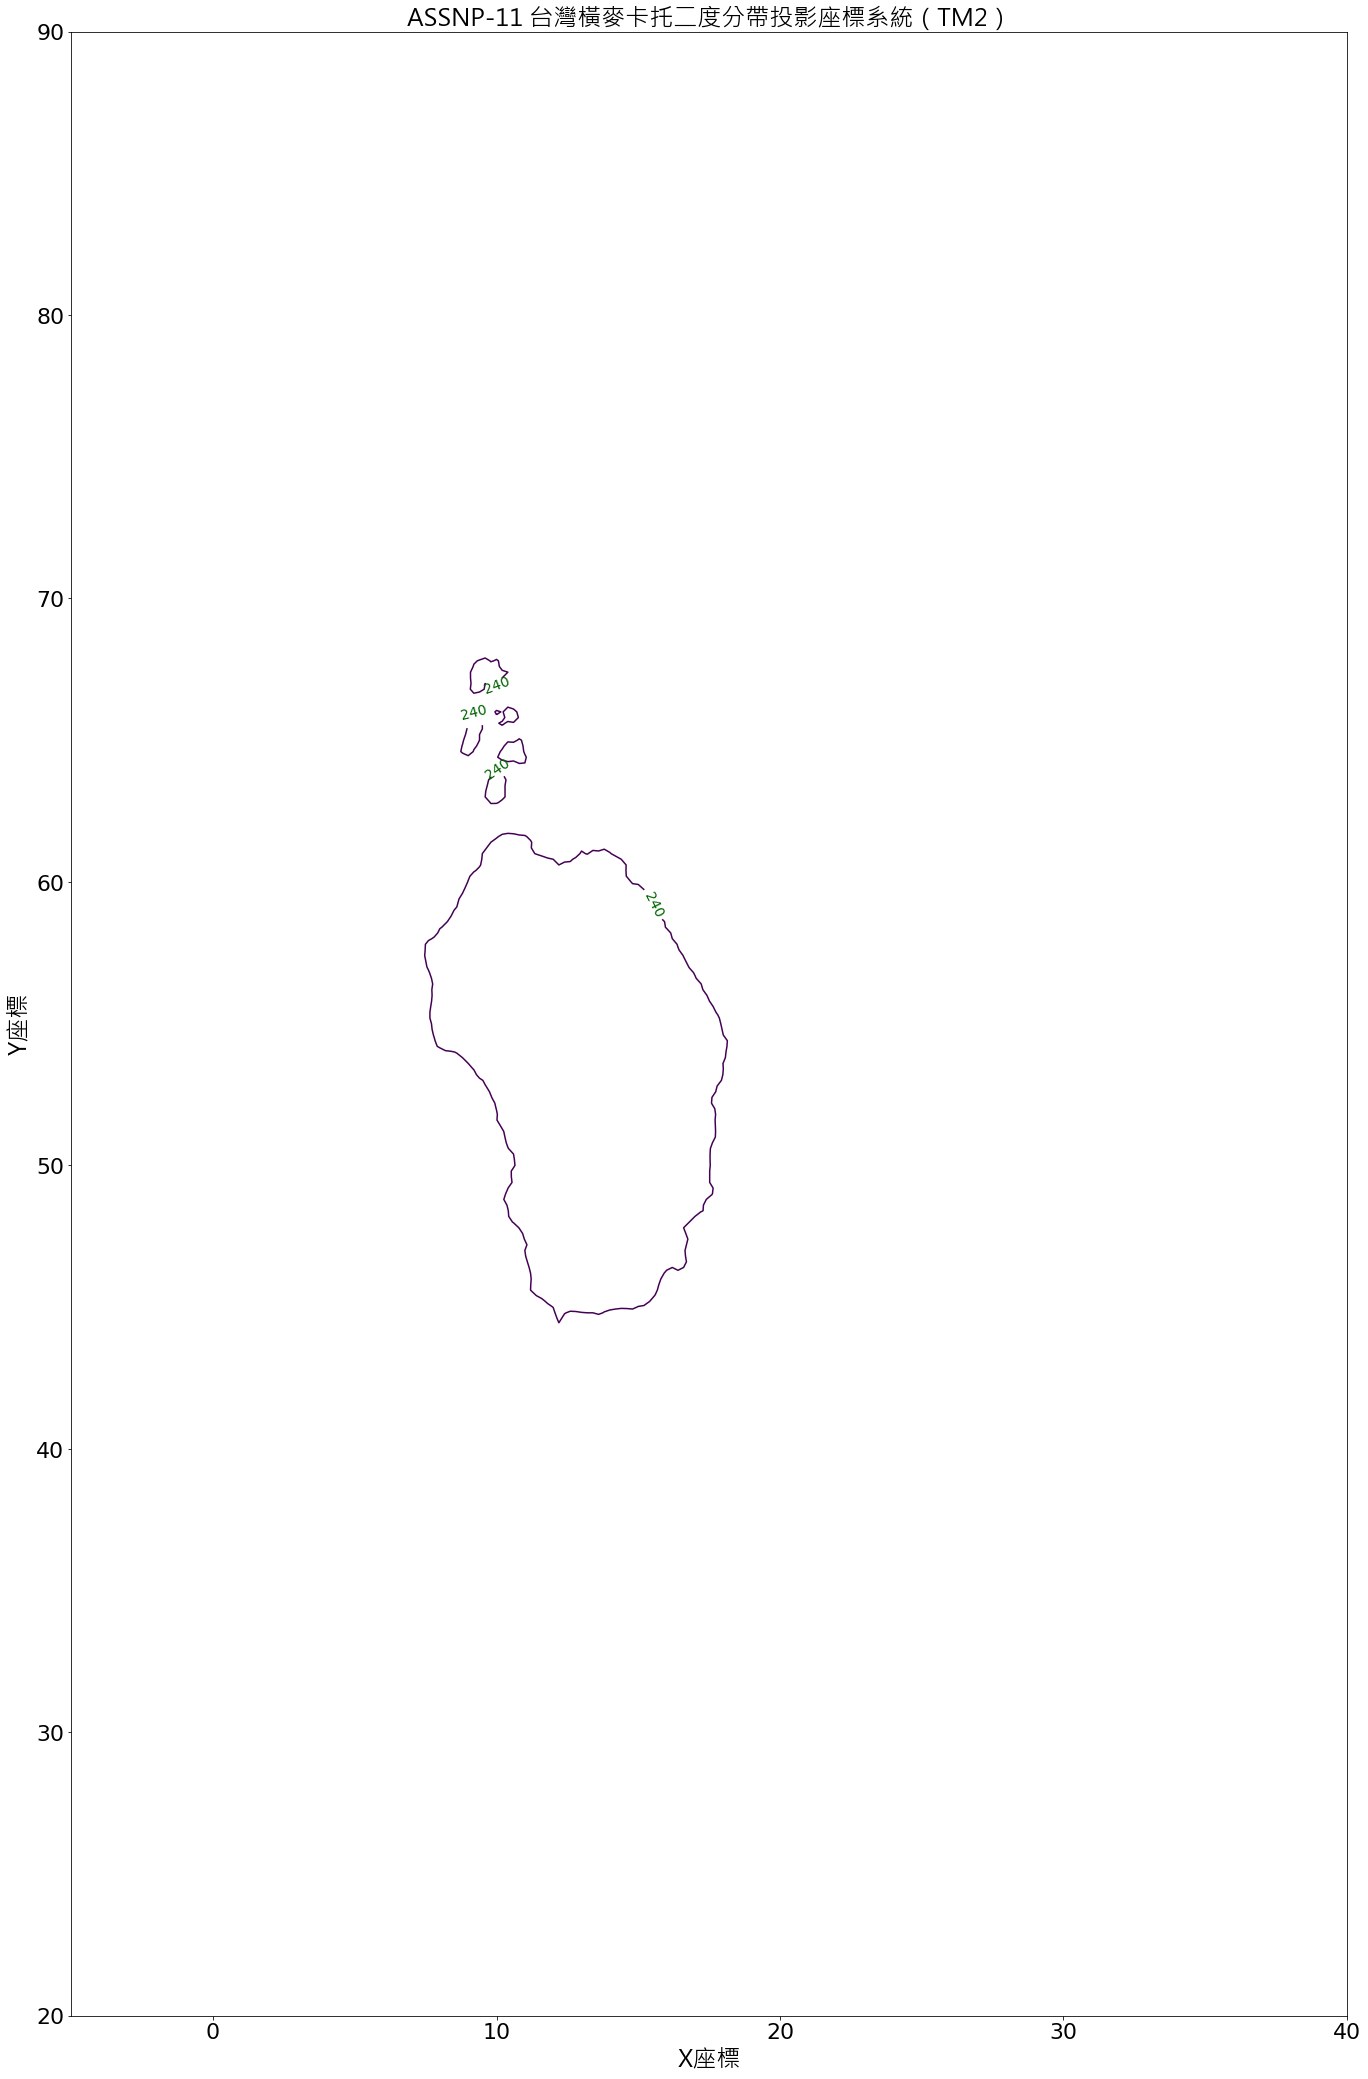

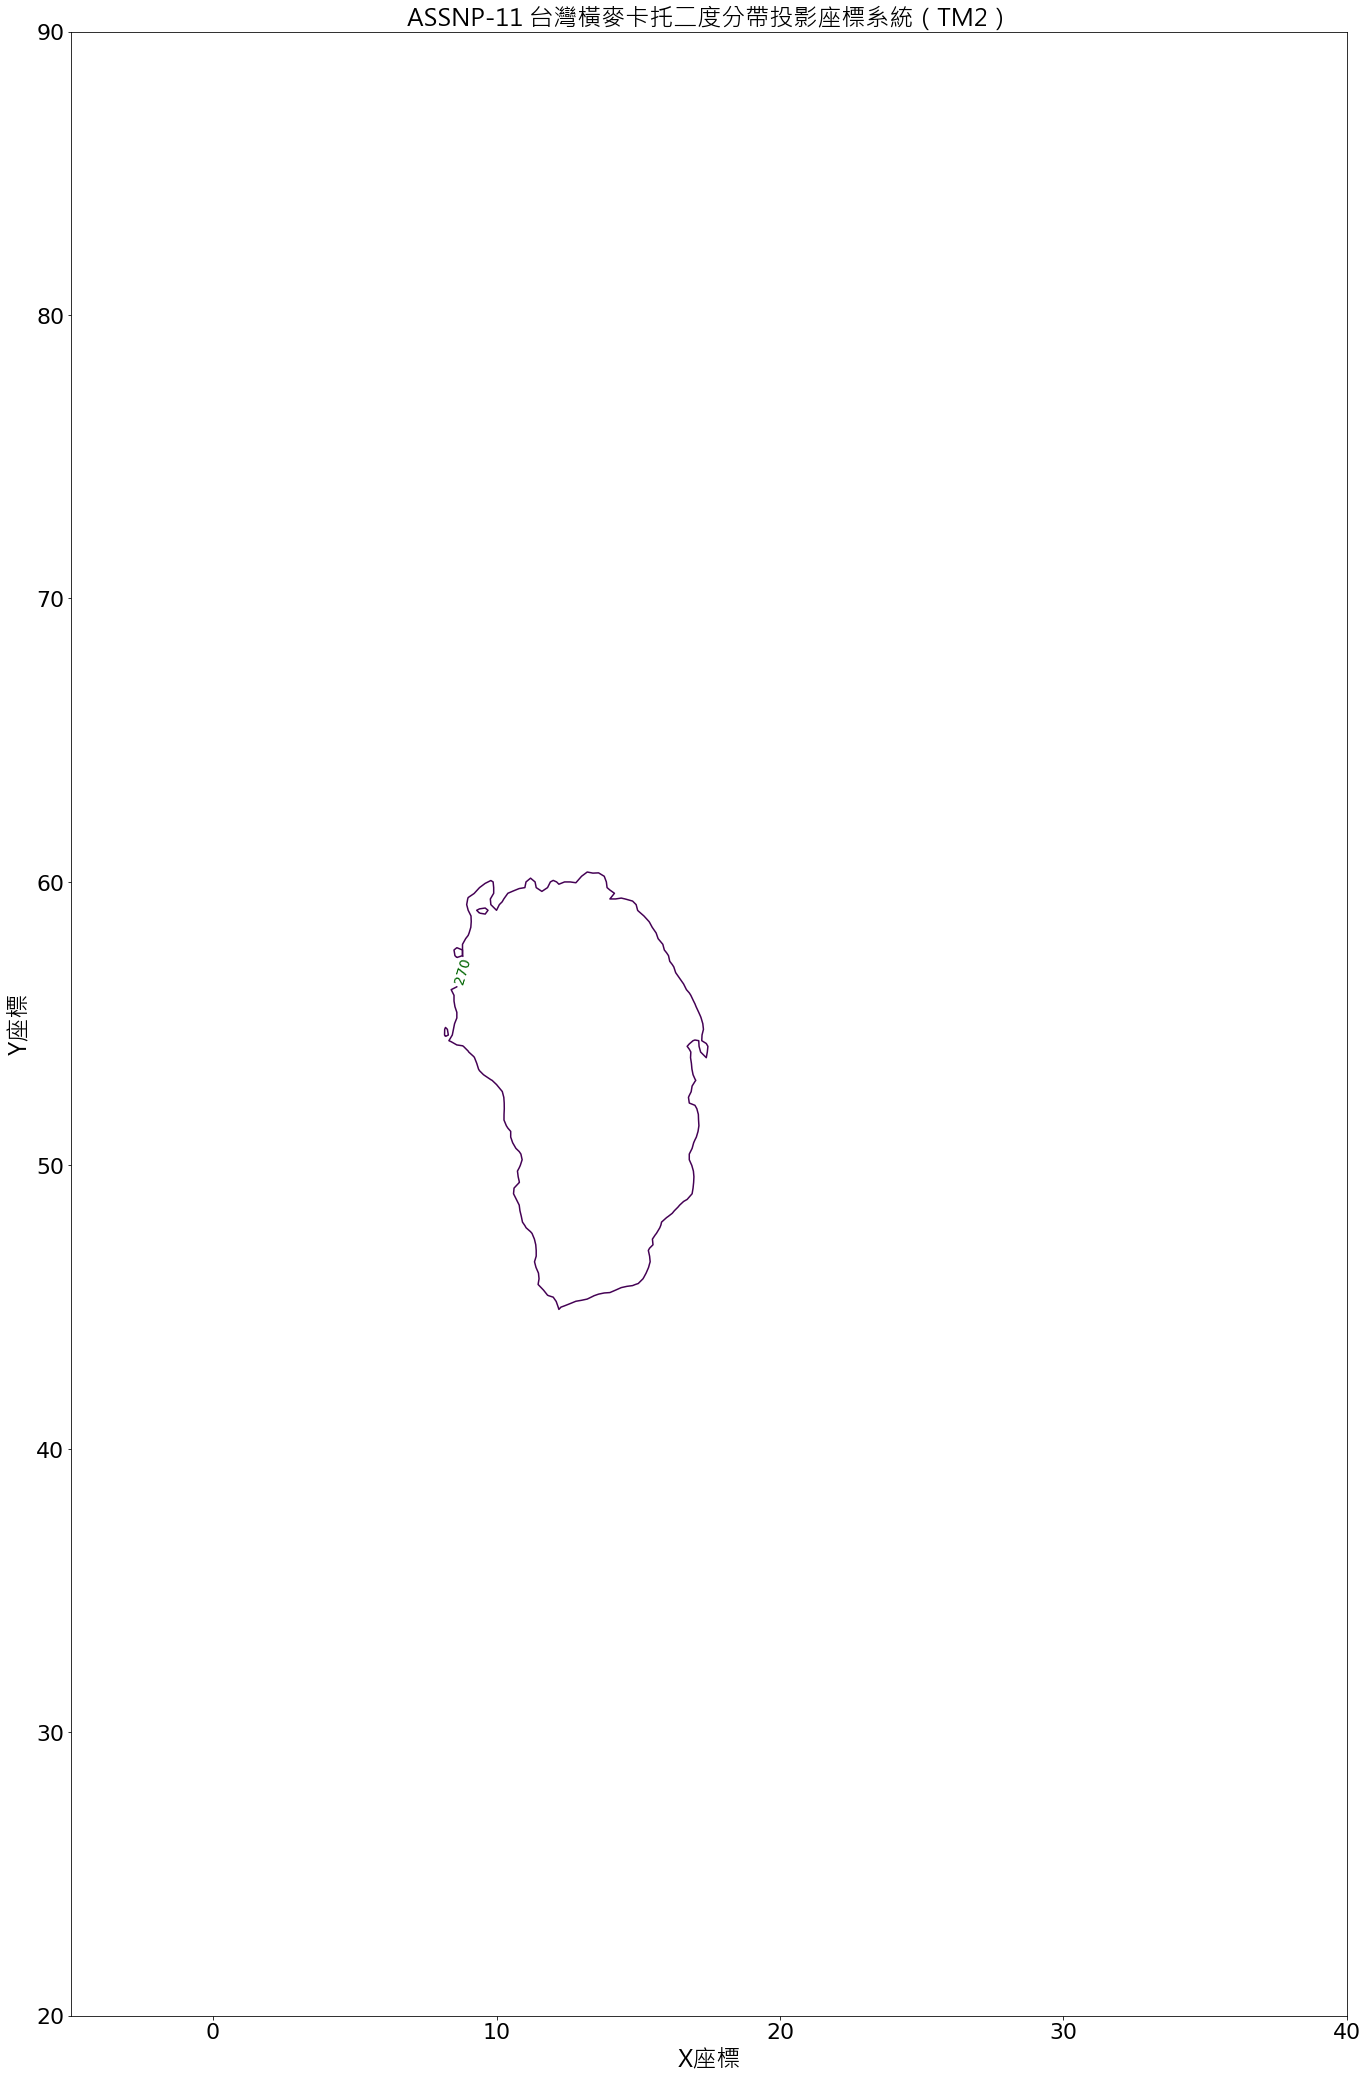

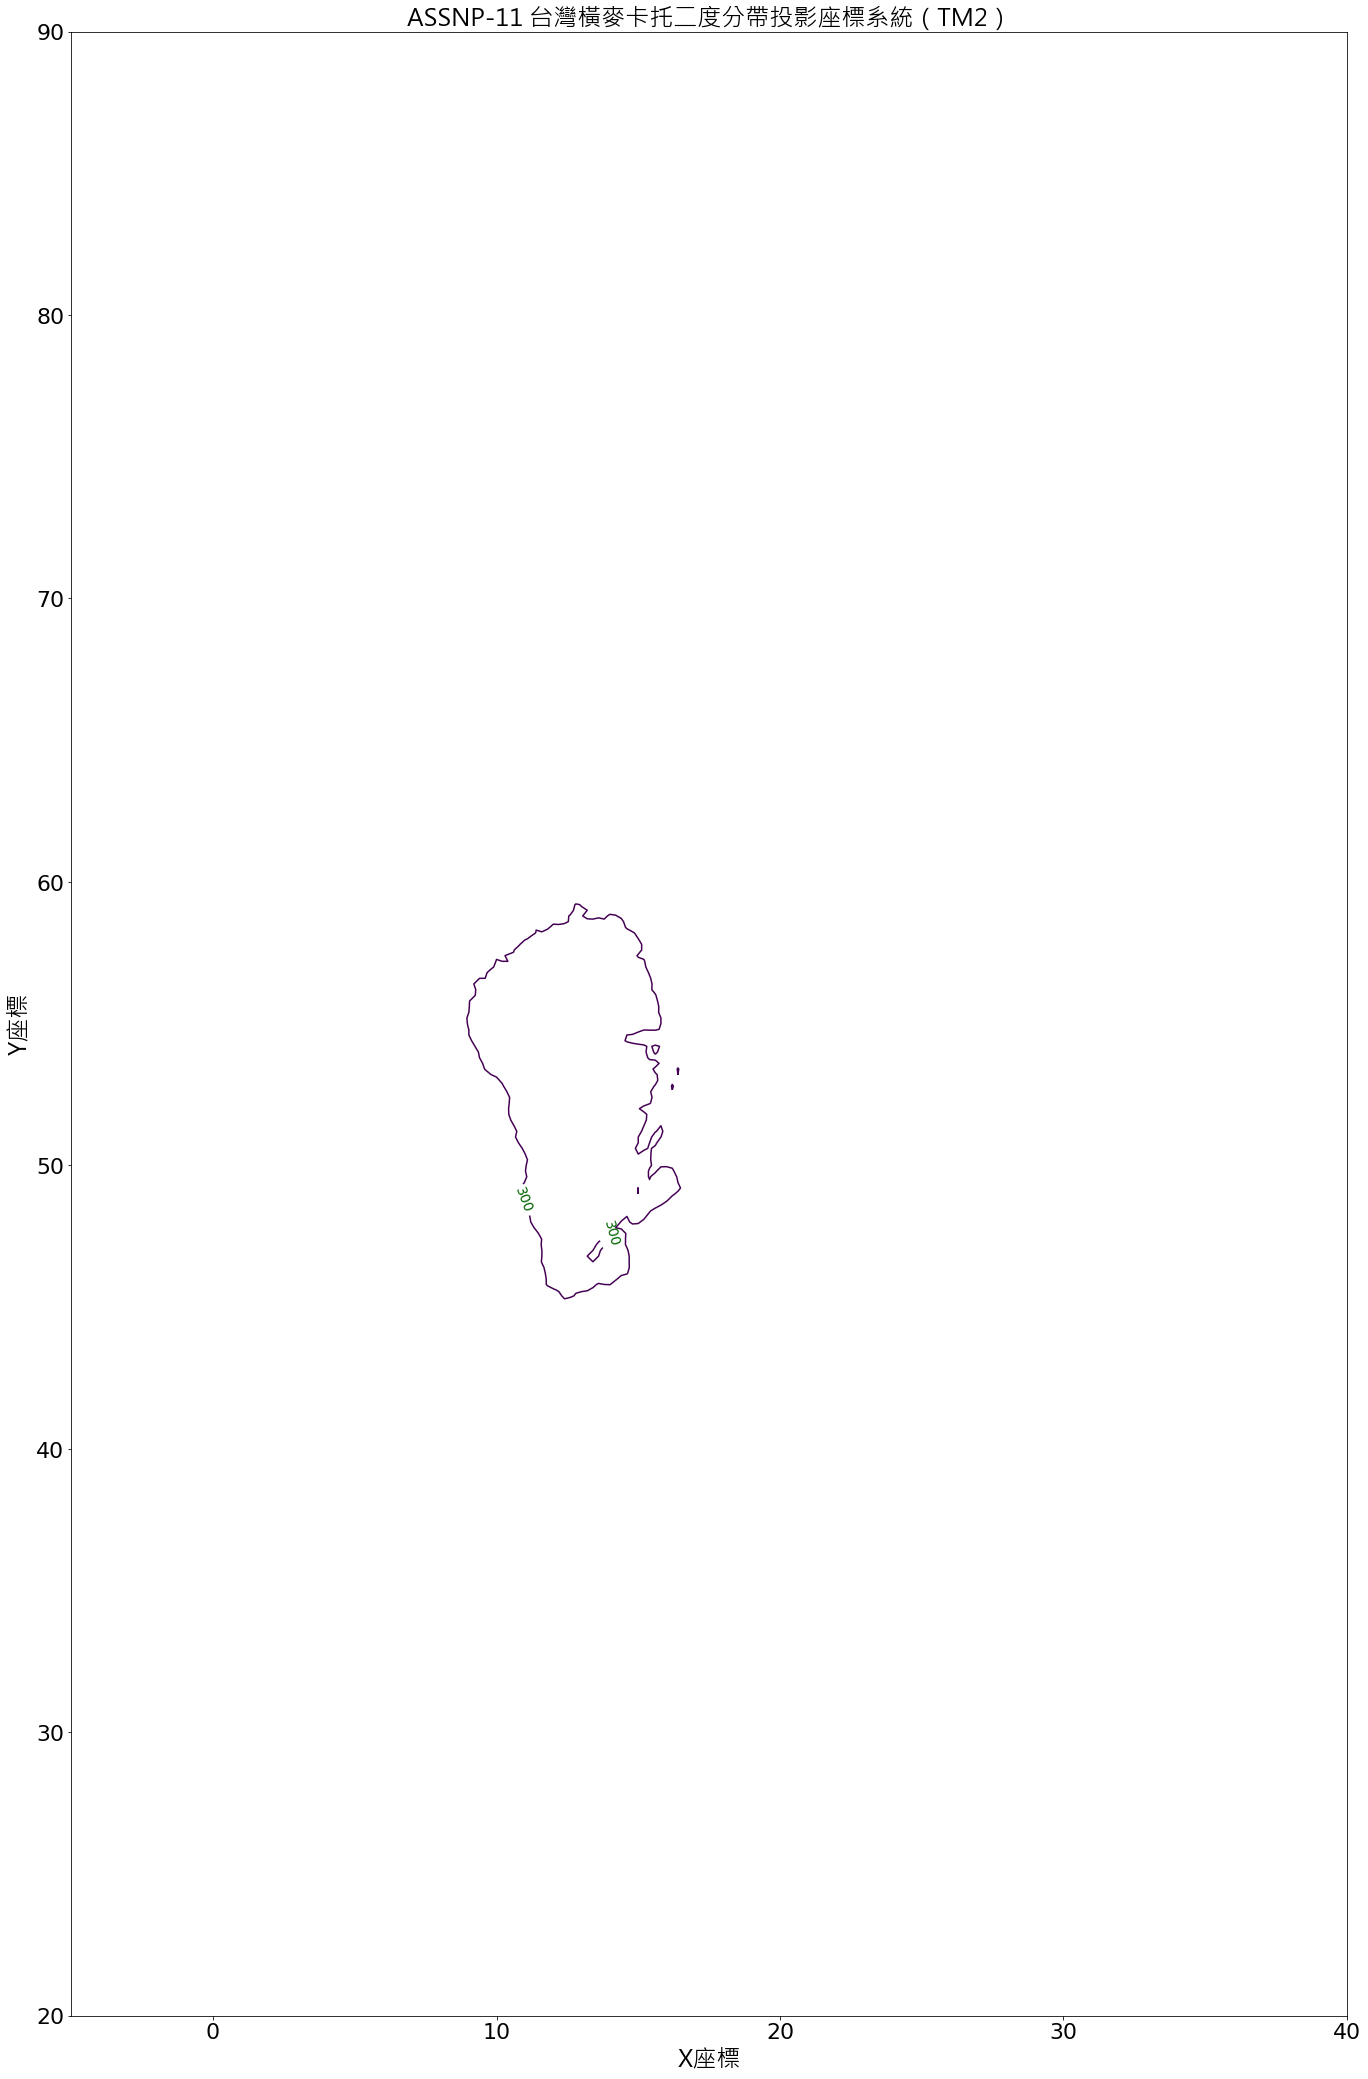

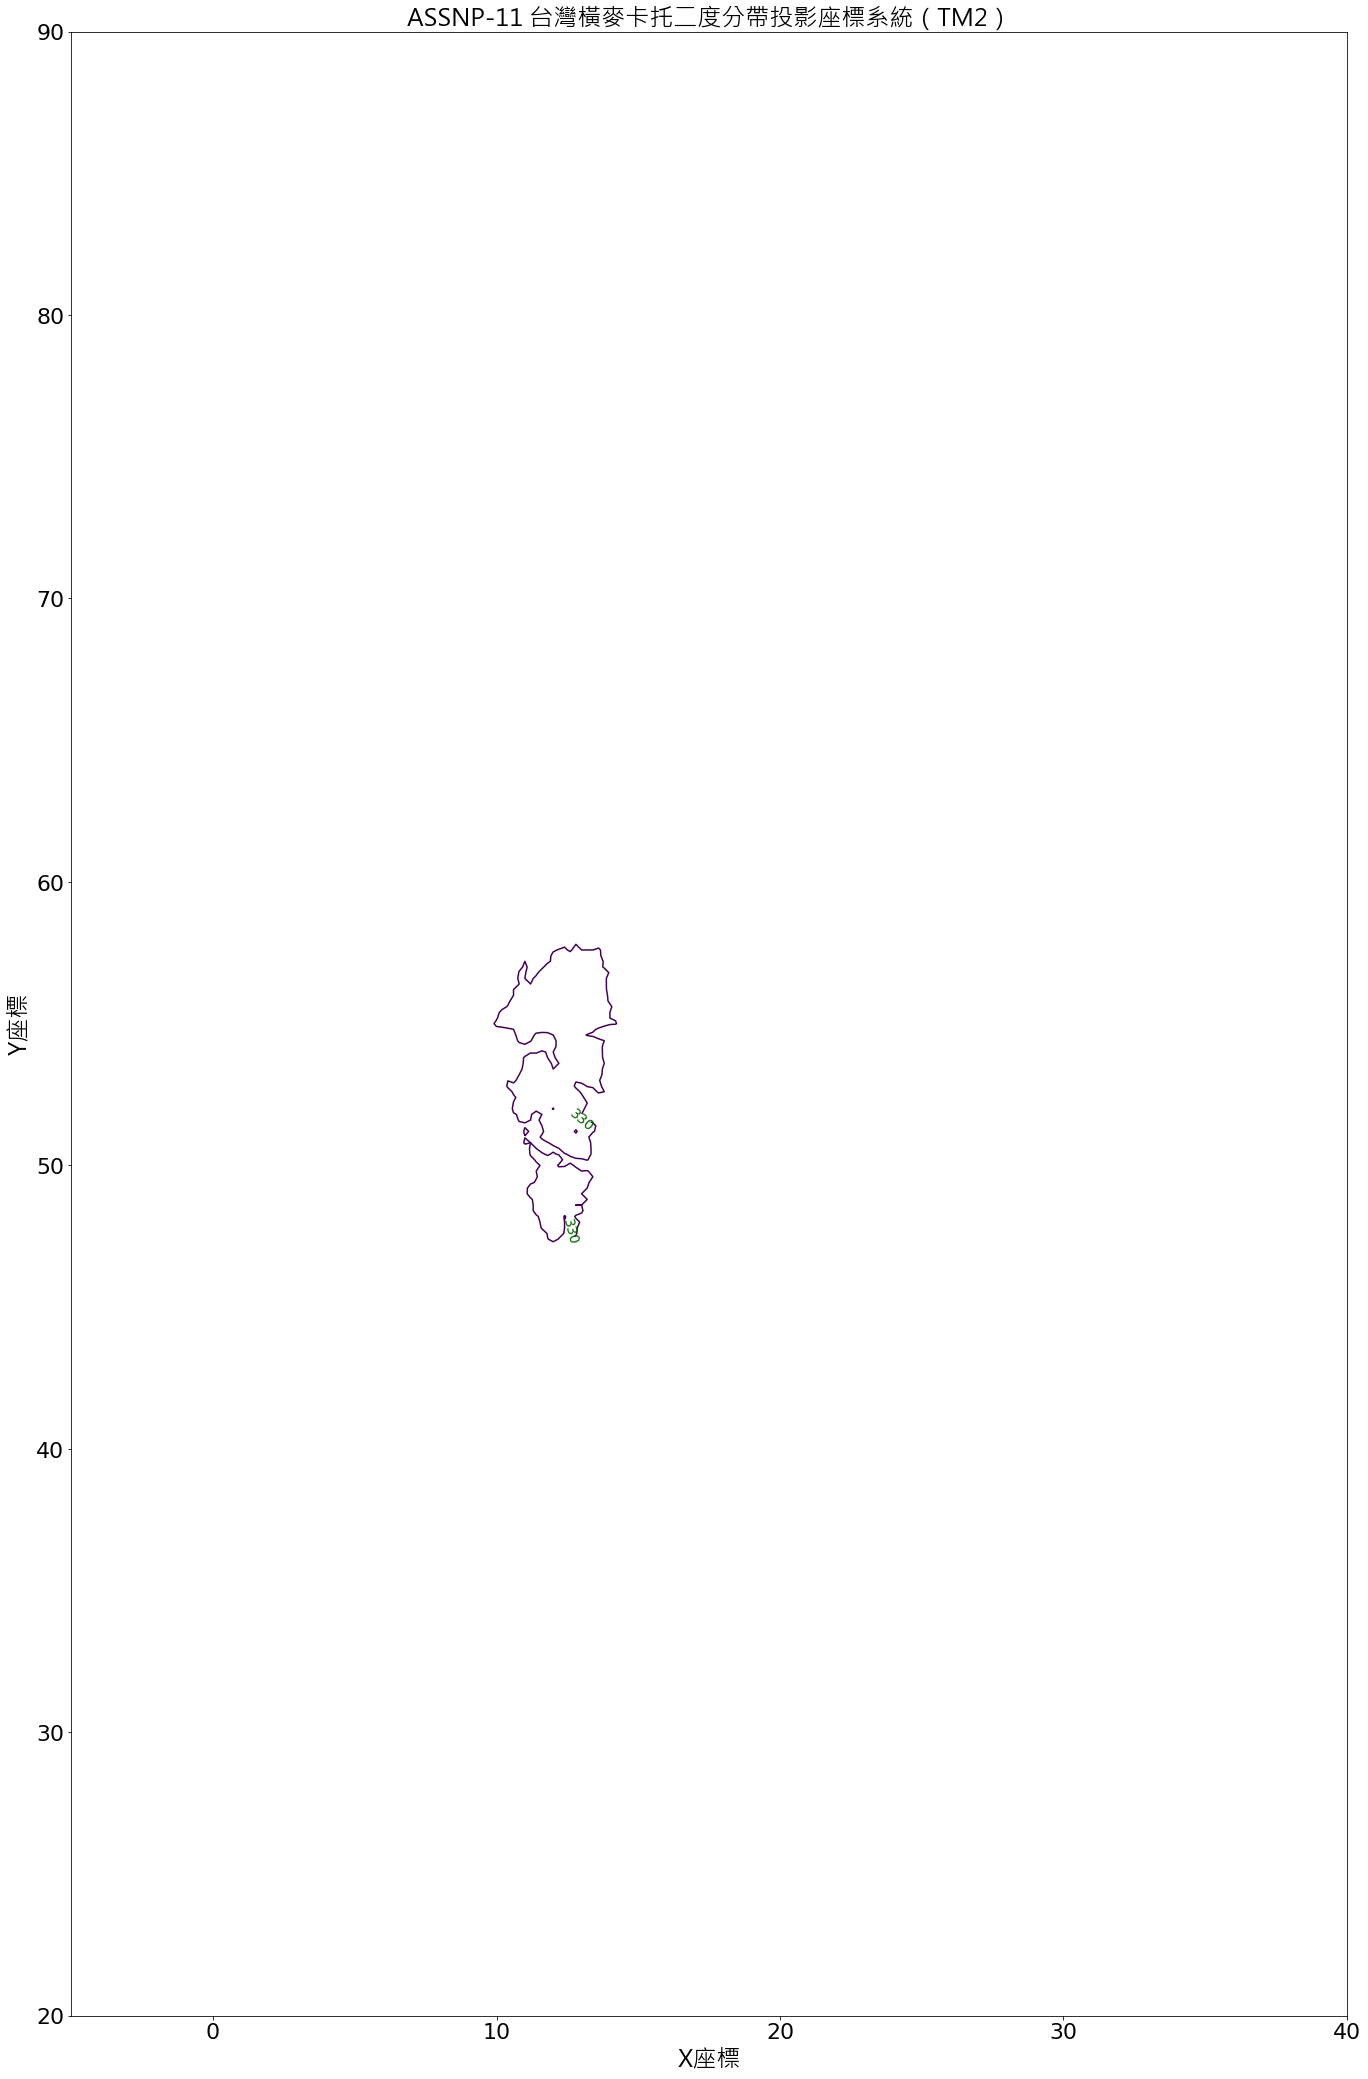

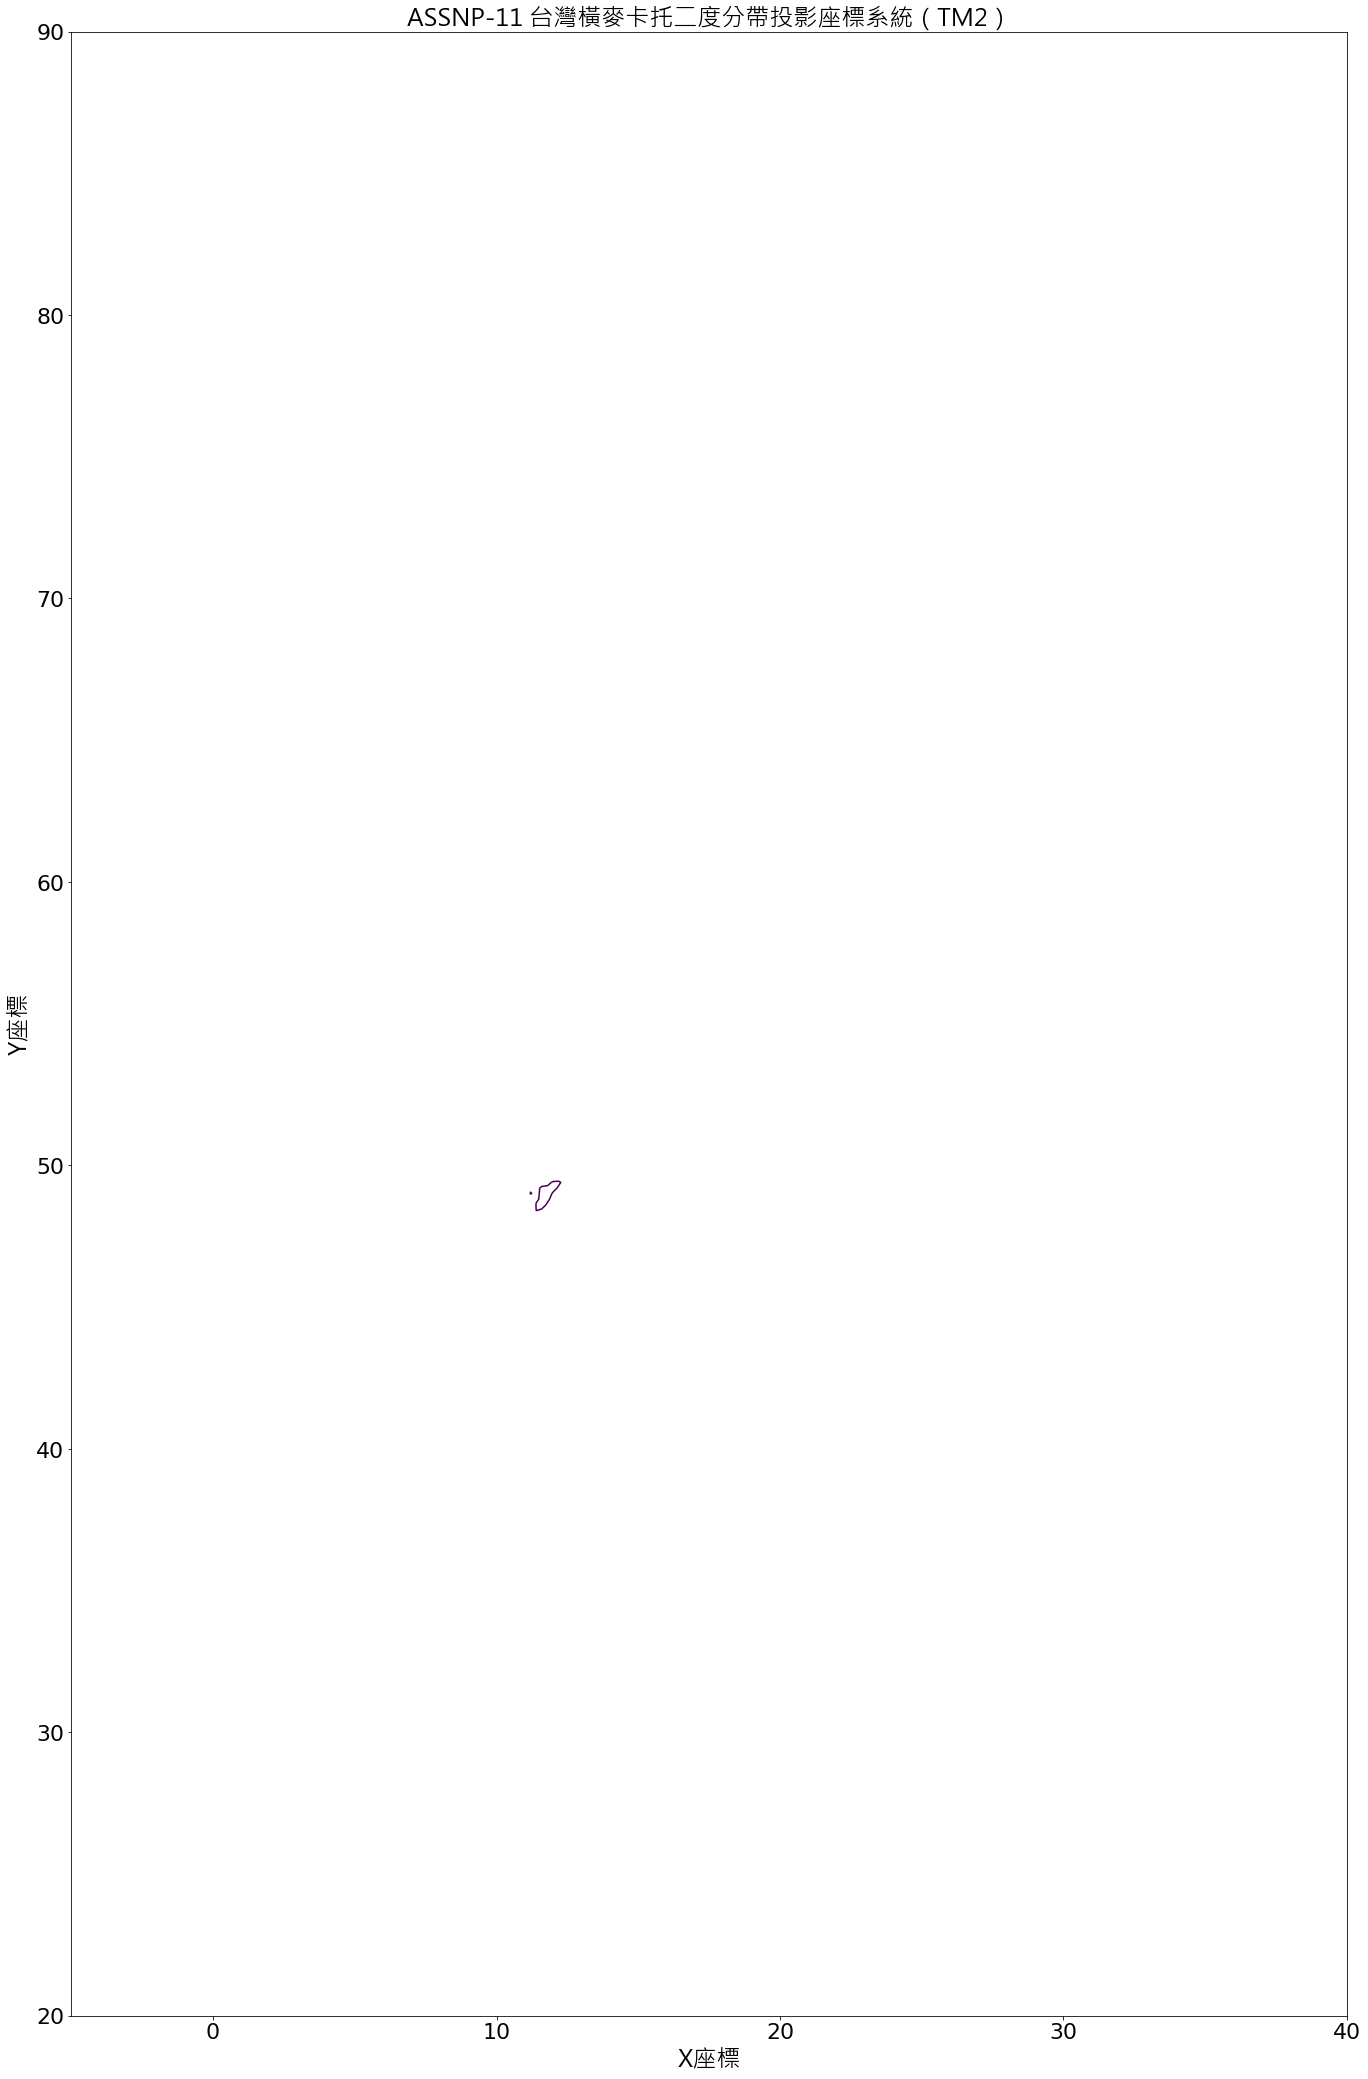

In [1]:
# ASSNP-11.py
# 2021-11-29
#
from datetime import datetime
dt_start = datetime.now()
#
import os
# to fix matplotlib warning
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    
    #
    left_margin = 2.0   # cm
    right_margin = 2.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 2.0    # cm
    bottom_margin = 2.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def new_plot_setting() :
    tup7 = set_graphic_area(45,70) # x, y 數值要相同, 不然地形圖會變形
    #
    fig = plt.figure(figsize=(tup7[0], tup7[1]))
    ax  = fig.add_subplot(1,1,1)
    fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
    #
    plt.xlabel('X座標', fontproperties=myfont, fontsize=24)
    plt.ylabel('Y座標', fontproperties=myfont, fontsize=24)
    #
    plt.xlim(-5, 40)    # xlim, ylim, need to be same
    plt.ylim(20, 90)    
    #
    x_ticks = np.linspace(0,40,5)
    y_ticks = np.linspace(20,90,8)
    #
    plt.xticks(x_ticks, fontsize=22)
    plt.yticks(y_ticks, fontsize=22)
    #
    plt.grid(False)
    plt.gca().set_aspect('equal', adjustable='box') # set X,Y same ratio & scale
# end def
#
path_data    = './data/'
path_graphic = './graphic/'
#
path_data    = './data/'
path_graphic = './graphic/'
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(fname='/home/jovyan/fonts/msjh.ttc')
#
# -------------------------------------------------------------------------------
#
tup7 = set_graphic_area(45,70)
#
fig = plt.figure(figsize=(tup7[0], tup7[1]))
# ax  = fig.add_subplot(1,1,1, projection='3d')
ax  = fig.add_subplot(1,1,1)
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlabel('X座標', fontproperties=myfont, fontsize=24)
plt.ylabel('Y座標', fontproperties=myfont, fontsize=24)
#
plt.xlim(-5, 40)    # xlim, ylim, need to be same
plt.ylim(20, 90)    
#
x_ticks = np.linspace( 0,40,5)
y_ticks = np.linspace(20,90,8)
#
plt.xticks(x_ticks, fontsize=22)
plt.yticks(y_ticks, fontsize=22)
#
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box') # set X,Y same ratio & scale
#
# --------------------------------------------------------------------------
#
# 逐筆讀入資料 dem-all-7.csv
# Read from the file into the array data(:,:)
# array data shape is (...., 3)
#
# Columns:
# data[..., 0] is array of float number
# data[..., 1] is array of float number
# data[..., 2] is array of float number
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
float_To_int = np.vectorize(np.int32)
#
data2 = np.loadtxt(path_data + 'dem-all-7.csv',delimiter=',',dtype='float')
min_item = np.amin(data2, axis=0) # axis=0 --> min of each column
max_item = np.amax(data2, axis=0) # axis=0 --> max of each column
print ('Left Down point:', float_To_int(min_item[0]), float_To_int(min_item[1]))
print ('Right Up point: ' , float_To_int(max_item[0]), float_To_int(max_item[1]))
print ('height (min, max)', min_item[2], max_item[2])
print ('\n')
#
# Left Down point:    0, 2040
# Right  Up point: 3800, 9000
# height (min, max) 0.0, 357.21
#
TM2_X = float_To_int(data2[..., 0]) # 二度分帶 X座標
TM2_Y = float_To_int(data2[..., 1]) # 二度分帶 Y座標
TM2_Z = data2[..., 2]               # DEM file z value, float type
#
# XYlist is sorted (x, y), first order is y, then x
#
XYlist = list(zip(TM2_X,TM2_Y))
#
# X, Y value
X = np.arange(-100, 3820, 20)
Y = np.arange(2040, 9020, 20)
Xmesh, Ymesh = np.meshgrid(X, Y)  # x-y 平面的網格
#
# X -100 .. 3800
# Y 2040 .. 9000
# 6980/20 ==> 349
# 3920/20 ==> 196
#
Zmesh = np.zeros(shape=(349,196),dtype=np.float16)
i = 0 ; j = 0
#
for y in np.arange(2040, 9020, 20) :
    print('y is', y)
    z = np.zeros(shape=(196),dtype=np.float16)
    zi = 0
    for x in np.arange(-100, 3820, 20):
        if (x,y) in XYlist :
            z[zi] = TM2_Z[i]
            i = i + 1
        else :
            z[zi] = 0.0
        # end if
        zi = zi + 1
    # end for
    Zmesh[j] = z
    j = j + 1
#end for
print ('\n')
#
factor_3D = 0.01
Xmesh_3D = factor_3D * Xmesh
Ymesh_3D = factor_3D * Ymesh
Zmesh_3C = np.around(Zmesh)
Zmesh_3D = Zmesh_3C.astype(int)
#
# If array-like, draw contour lines at the specified levels. The values must be in increasing order.
#
levels = (15,30,60,90,120,150,180,210,240,270,300,330,350)
i = 0
for level in levels : 
    i = i + 1
    if len(str(level)) == 2 :
        str_level = '0' + str(level)
    else :
        str_level = str(level)
    # end if
    #
    contour_set = plt.contour(Xmesh_3D, Ymesh_3D, Zmesh_3D, [level]) 
    plt.clabel(contour_set, inline=True, colors='darkgreen', fontsize=14, fmt='%d')
    plt.title('ASSNP-11 台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=24)
    plt.savefig(path_graphic + "ASSNP-dem-" + str_level + "-label.png", format="png",dpi=100, bbox_inches='tight')
    plt.draw()
    #
    if i < len(levels) :
        new_plot_setting()
    # end if
# end for
#
# ----------------------
#
print(dt_start)
dt_end = datetime.now()
print(dt_end)
#
print('done')